# Data reading, cleaning and general initialisation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/601-330-days/Data_5IAL_3_601.csv
/kaggle/input/301-17mar-1day/Data_5IAL_3_30114-3.csv
/kaggle/input/301-330-days/Data_5IAL_3_301.csv


## importing Packages

In [2]:
from pandas_profiling import ProfileReport
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

print('Importing all done!')

Importing all done!


## Reading data from CSV
Reading both data from unit 301 and 601 from the masterplant

In [3]:
data=pd.read_csv('/kaggle/input/301-330-days/Data_5IAL_3_301.csv',parse_dates=[1],index_col=[0])
data.rename(columns={'0':'Date'},inplace=True)
data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Date  5IAL_3_TT301.50  5IAL_3_QIT301.52  5IAL_3_PIT 301.55  \
0 2022-04-10 12:00:00            21.80              9.84              -0.02   
1 2022-04-10 12:01:00            21.80              9.84              -0.02   
2 2022-04-10 12:02:00            21.80              9.84              -0.02   
3 2022-04-10 12:03:00            21.78              9.84              -0.02   
4 2022-04-10 12:04:00            21.78              9.84              -0.02   

   5IAL_3_QIT301.57  5IAL_3_PIT301.60  5IAL_3_FIT301.61MF  5IAL_3_FIT301.61VF  \
0               0.0               0.0                 0.0                 0.0   
1               0.0               0.0                 0.0                 0.0   
2               0.0               0.0                 0.0                 0.0   
3               0.0               0.0                 0.0                 0.0   
4               0.0               0.0                 0.0                 0.0   

   5IAL_3_FIT301.61D  5IAL_3_PIT301.63  ...  5IAL_3_GSC301.44  \
0            0.00105              2.07  ...                 0   
1            0.00106              2.07  ...                 0   
2            0.00102              2.07  ...                 0   
3            0.00105              2.07  ...                 0   
4            0.00104              2.07  ...                 0   

   5IAL_3_GSO301.44  5IAL_3_LSL301.64 5IAL_3_LSL301.68  5IAL_3_LSLL301.69  \
0                 0                 0                0                  0   
1                 0                 0                0                  0   
2                 0                 0                0                  0   
3                 0                 0                0                  0   
4                 0                 0                0                  0   

   5IAL_3_301.OCCUPIED  5IAL_3_LIT301.54  5IAL_3_LSH301.56  5IAL_3_XPV301.13  \
0                    0              1.40                 0               0.0   
1                    0              1.40                 0               0.0   
2                    0              1.41                 0               0.0   
3                    0              1.40                 0               0.0   
4                    0              1.40                 0               0.0   

   5IAL_3_WY301.54  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 39 columns]

## Readin CIP Data

In [4]:
fields = ['0', '5IAL_3_PC601.70FSP','5IAL_3_PC601.70PSP','5IAL_3_PIT601.55']

data_cip = pd.read_csv('/kaggle/input/601-330-days/Data_5IAL_3_601.csv', skipinitialspace=True, usecols=fields,parse_dates=[0])

data_cip.head()

0  5IAL_3_PIT601.55  5IAL_3_PC601.70FSP  \
0 2022-04-10 12:00:00              1.31                 5.0   
1 2022-04-10 12:01:00              1.30                 5.0   
2 2022-04-10 12:02:00              1.30                 5.0   
3 2022-04-10 12:03:00              1.30                 5.0   
4 2022-04-10 12:04:00              1.30                 5.0   

   5IAL_3_PC601.70PSP  
0                1.31  
1                1.30  
2                1.30  
3                1.30  
4                1.30

## Reading more recent data

In [5]:
data_17=pd.read_csv('/kaggle/input/301-17mar-1day/Data_5IAL_3_30114-3.csv',parse_dates=[1])
data_17['flow_norm']=(data_17['5IAL_3_FIT301.61MF']-40.062658)/60.937859
data_17['press_norm']=(data_17['5IAL_3_P301.70']-0.486876)/0.859226

data_17.head()


Unnamed: 0                   0  5IAL_3_TT301.50  5IAL_3_QIT301.52  \
0           0 2023-03-16 08:00:00            22.88             10.32   
1           1 2023-03-16 08:01:00            23.18             10.32   
2           2 2023-03-16 08:02:00            23.46             10.27   
3           3 2023-03-16 08:03:00            23.69             10.25   
4           4 2023-03-16 08:04:00            23.95             10.21   

   5IAL_3_PIT 301.55  5IAL_3_QIT301.57  5IAL_3_PIT301.60  5IAL_3_FIT301.61MF  \
0               0.55            208.14              -0.0              137.15   
1               0.56            198.30               0.0              136.13   
2               0.57            188.61              -0.0              135.62   
3               0.57            179.39              -0.0              136.57   
4               0.58            166.01               0.0              135.86   

   5IAL_3_FIT301.61VF  5IAL_3_FIT301.61D  ...  5IAL_3_LSL301.64  \
0                7.87             1.0460  ...                 0   
1                7.76             1.0521  ...                 0   
2                7.69             1.0585  ...                 0   
3                7.70             1.0645  ...                 0   
4                7.63             1.0688  ...                 0   

   5IAL_3_LSL301.68  5IAL_3_LSLL301.69  5IAL_3_301.OCCUPIED 5IAL_3_LIT301.54  \
0                 0                  0                    1            34.99   
1                 0                  0                    1            35.91   
2                 0                  0                    1            36.90   
3                 0                  0                    1            37.87   
4                 0                  0                    1            39.02   

   5IAL_3_LSH301.56  5IAL_3_XPV301.13  5IAL_3_WY301.54  flow_norm  press_norm  
0                 0              2.12           556.42   1.593219    1.737755  
1                 0              2.02           576.42   1.576480    1.737755  
2                 0              1.99           596.42   1.568111    1.889054  
3                 0              1.98           616.42   1.583701    1.714478  
4                 0              1.97           636.42   1.572050    1.761031  

[5 rows x 42 columns]

## Create a report
This takes a few minutes so generate only when update is needed

In [6]:
#report=ProfileReport(data)
#report.to_file('output.html')

In [7]:
print(data.dtypes)

Date                    datetime64[ns]
5IAL_3_TT301.50                float64
5IAL_3_QIT301.52               float64
5IAL_3_PIT 301.55              float64
5IAL_3_QIT301.57               float64
5IAL_3_PIT301.60               float64
5IAL_3_FIT301.61MF             float64
5IAL_3_FIT301.61VF             float64
5IAL_3_FIT301.61D              float64
5IAL_3_PIT301.63               float64
5IAL_3_P301.70                 float64
5IAL_3_R301.71                 float64
5IAL_3_P301.72                 float64
5IAL_3_301.BatchName            object
5IAL_3_XPV301.05                 int64
5IAL_3_XPV301.06                 int64
5IAL_3_XPV301.08                 int64
5IAL_3_XPV301.09                 int64
5IAL_3_XPV301.22                 int64
5IAL_3_XPV301.35                 int64
5IAL_3_XPV301.36                 int64
5IAL_3_XPV301.42                 int64
5IAL_3_XPV301.43                 int64
5IAL_3_XPV301.46                 int64
5IAL_3_XPV301.53                 int64
5IAL_3_XPV301.54         

## Look how many unique batches there are

In [8]:
Batch_Names=data['5IAL_3_301.BatchName']

unieque_names=Batch_Names.unique()

#np.set_printoptions(threshold=sys.maxsize)

data['5IAL_3_301.BatchName']= data['5IAL_3_301.BatchName'].fillna('No Batch Specified')

print(unieque_names)

[nan 'YP5812210101' 'YP5812210102' ... 'KB212306501' 'NA KB212306501'
 'KC112306501']


# Checking pump pressures and flows for irregularities
This section will be exploring the 4 sensors that are closest to the pump and most likely to carry vital information.\
For this they are first compared to eachother normaly, and then transformed.

## Compare the pressure profiles
Make a plot that puts two 1 day intervals next to eachother, one being from 'before' membrane failure and one being from a random other day.

Note that the peaks till 3.5 are likely to be from the CIP cleaning process

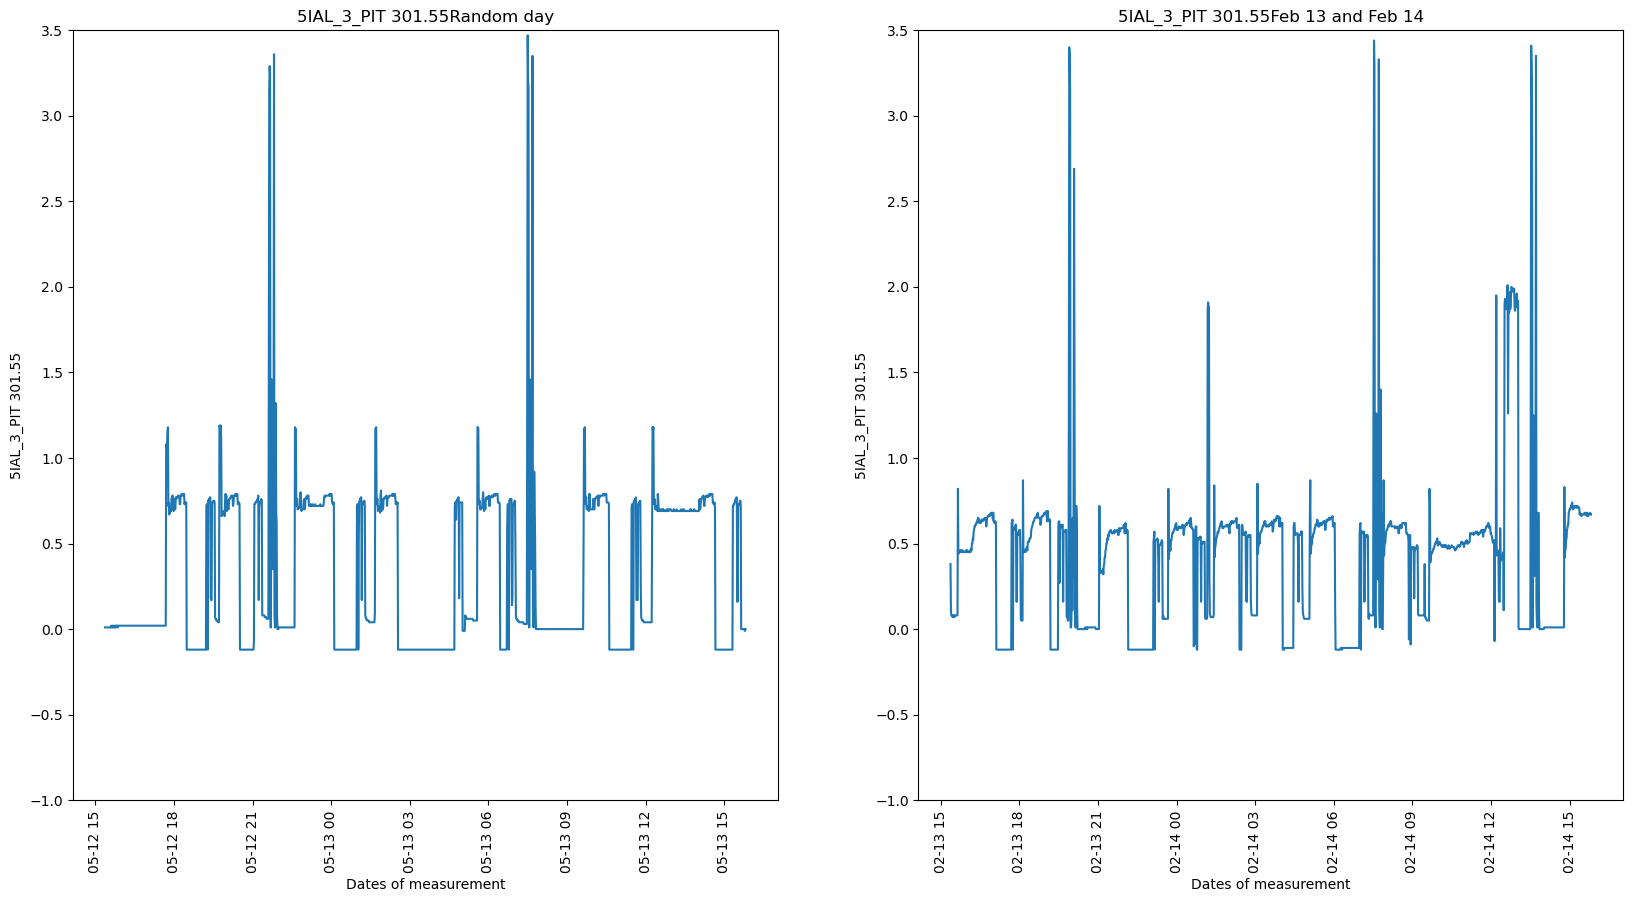

In [9]:
date1=datetime.datetime(2022,5,12,15,22)
date2=datetime.datetime(2022,5,13,15,50)

datefeb1=datetime.datetime(2023,2,13,15,22)
datefeb2=datetime.datetime(2023,2,14,15,50)



ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]



data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot( data['Date'][ind1[0]:ind2[0]] , (data[data_column][ind1[0]:ind2[0]]) )
ax[0].set_title(data_column + 'Random day')
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel(data_column)
ax[0].set_ylim(-1, 3.5)
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot( data['Date'][indfeb1[0]:indfeb2[0]] , (data[data_column][indfeb1[0]:indfeb2[0]]) )
ax[1].set_title(data_column + 'Feb 13 and Feb 14')
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel(data_column)
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)


## Compare input and output pressures
The membrame pump is driven by air pressure to create pressure in the pipes. \
Here a driving pressure of about 2 bar generates a pressure behind the pump of ~0.7 bar.

<Figure size 640x480 with 0 Axes>

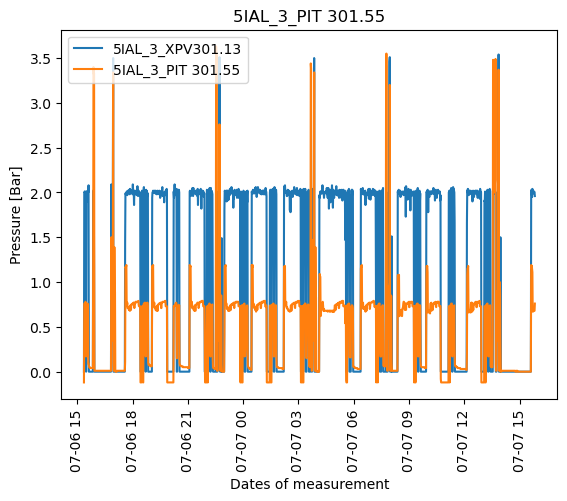

<Figure size 640x480 with 0 Axes>

In [10]:
date1=datetime.datetime(2022,7,6,15,22)
date2=datetime.datetime(2022,7,7,15,50)


ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

#+ data['5IAL_3_XPV301.13'][ind1[0]:ind2[0]])
data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots()


ax.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_XPV301.13'][ind1[0]:ind2[0]]  ),data['Date'][ind1[0]:ind2[0]] , (data[data_column][ind1[0]:ind2[0]]  ))
ax.set_title(data_column)
ax.set_xlabel('Dates of measurement')
ax.set_ylabel('Pressure [Bar]')
ax.tick_params(axis='x', labelrotation=90)
ax.legend(['5IAL_3_XPV301.13','5IAL_3_PIT 301.55'])
plt.figure()

# Check the form of 2 other very colosely related columns

# plt.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_P301.70'][ind1[0]:ind2[0]]) )
# ax.tick_params(axis='x', labelrotation=90)
# plt.figure()

# plt.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]]) )
# ax.tick_params(axis='x', labelrotation=90)

## PIT 55 VS XPV 13
See how the driving pressure and resulting pressure are correlated to eachother.\
Here the most common value is XPV at 2 bar and PIT 0.7 bar. Some outliers exist where the resulting pressure is higher than the driving pressure, these must be outliers as a result of the cip cleaning process. This process apperantly supplies pressure at the suction side of the membrane pump. \
\
Note that this only is for the period of a slightly more then a day\
\
To make this plot beter i should change the 'hue' or seperating factor from batch code to 'batches that are CIP vs batches that are not'

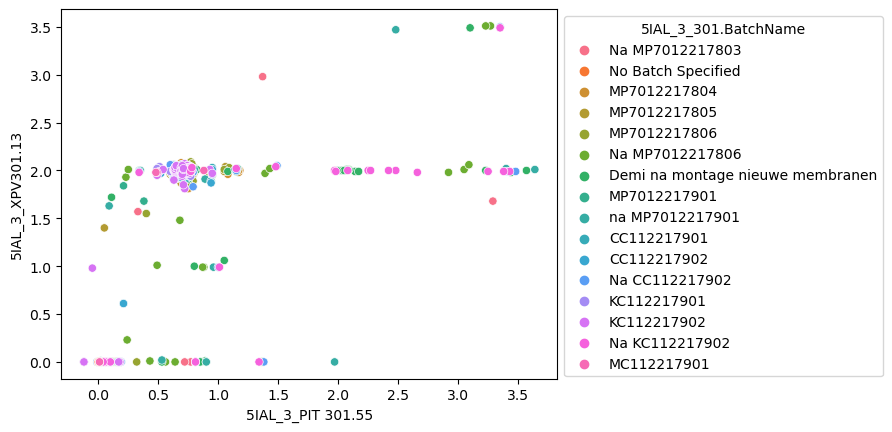

In [11]:
date1=datetime.datetime(2022,6,27,12,22)
date2=datetime.datetime(2022,6,28,19,22)


ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]


ax=sns.scatterplot(x=data[data_column][ind1[0]:ind2[0]], y=data['5IAL_3_XPV301.13'][ind1[0]:ind2[0]],hue=data['5IAL_3_301.BatchName'][ind1[0]:ind2[0]])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

## Comparing Pumppressure with pressure behind pump

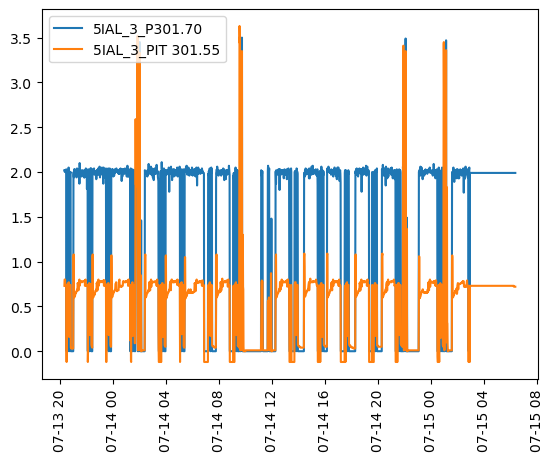

In [12]:
date1=datetime.datetime(2022,7,13,20,22)
date2=datetime.datetime(2022,7,15,6,22)


ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

#plt.plot(data['Date'],data['5IAL_3_XPV301.13'])
plt.plot(data['Date'][ind1[0]:ind2[0]],data['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]])
plt.legend(['5IAL_3_P301.70','5IAL_3_PIT 301.55'])
plt.tick_params(axis='x', labelrotation=90)

## Very big plot comparing a few simalar profiles with eachother
as can be seen, they are highly correlated

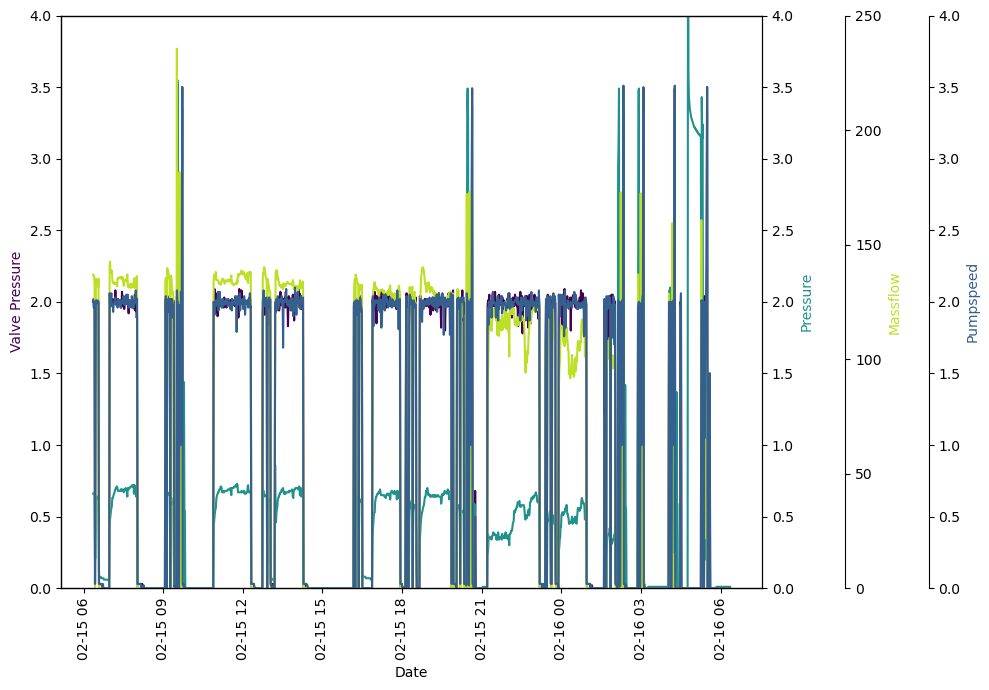

In [13]:
date1=datetime.datetime(2023,2,15,6,22)
date2=datetime.datetime(2023,2,16,6,22)


ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

# More versatile wrapper
fig, host = plt.subplots(figsize=(10,7)) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
    
# host.set_xlim(0, 2)
host.set_ylim(0, 4)
par1.set_ylim(0, 4)
par2.set_ylim(0, 250)
par3.set_ylim(0,4)
    
host.set_xlabel("Date")
host.set_ylabel("Valve Pressure")
par1.set_ylabel("Pressure")
par2.set_ylabel("Massflow")
par3.set_ylabel('Pumpspeed')

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)
color4 = plt.cm.viridis(0.3)

p1, = host.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_XPV301.13'][ind1[0]:ind2[0]]) ,    color=color1, label="Valve Pressure")
p2, = par1.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]]) ,    color=color2, label="PIT Pressure")
p3, = par2.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]]) , color=color3, label="Massflow")
p4, = par3.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_P301.70'][ind1[0]:ind2[0]]) , color=color4, label="Pumpspeed")

lns = [p1, p2, p3, p4]
#host.legend(handles=lns, loc='best')


# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
par3.spines['right'].set_position(('outward', 120))

# no x-ticks                 
#par2.xaxis.set_ticks([])
#par3.xaxis.set_ticks([])

# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')
host.tick_params(axis='x', labelrotation=90)

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

# Adjust spacings w.r.t. figsize
fig.tight_layout()
# Alternatively: bbox_inches='tight' within the plt.savefig function 
#                (overwrites figsize)


# Best for professional typesetting, e.g. LaTeX
#plt.savefig("pyplot_multiple_y-axis.pdf")
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=200)'

# Comparing normalized pressure profiles 
this section will make the comparison from above again but now using the Z-score

In [14]:
print(np.mean(data['5IAL_3_PIT 301.55']))
print(np.std(data['5IAL_3_PIT 301.55']))

0.19296170517190583
0.38171527018994034


## make a subset of the pressure related variables for easier selection

In [15]:
pressure=data.loc[:, ['5IAL_3_FIT301.61MF', '5IAL_3_XPV301.13', '5IAL_3_P301.70','5IAL_3_PIT 301.55']] 
pressure.head()

5IAL_3_FIT301.61MF  5IAL_3_XPV301.13  5IAL_3_P301.70  5IAL_3_PIT 301.55
0                 0.0               0.0             0.0              -0.02
1                 0.0               0.0             0.0              -0.02
2                 0.0               0.0             0.0              -0.02
3                 0.0               0.0             0.0              -0.02
4                 0.0               0.0             0.0              -0.02

## Normalise the selection with use of the Z-Score
The Z-score can be described as:
$$ Z=\frac{x-\mu}{\sigma} $$
Herein $x$ is your value, $\mu$ is the average of the population that value is taken from, and $\sigma$ is the standard deviation of the population.
It is basicaly a measure of how far a given value is away from its mean in standard deviations.
To give you a good feeling, in a normal distribution 66% of values are within 1 std of the mean. 99% are withing 2 std and 99.9 is within 3\
\
Note that i am not yet sure how representative all of this is for the data, it just allows me to use Massflow and resulting pressure more easaly because the range of values are simalar and i dont have to specify two seperate axis with values within 1 figure.

In [16]:
pres_norm=pd.DataFrame()
for col in pressure:
    zval=(pressure[col]-np.mean(pressure[col]))/np.std(pressure[col])
    pres_norm=pd.concat([pres_norm,zval],axis=1)
    
pres_norm.head()

5IAL_3_FIT301.61MF  5IAL_3_XPV301.13  5IAL_3_P301.70  5IAL_3_PIT 301.55
0           -0.657435         -0.566649       -0.566645          -0.557907
1           -0.657435         -0.566649       -0.566645          -0.557907
2           -0.657435         -0.566649       -0.566645          -0.557907
3           -0.657435         -0.566649       -0.566645          -0.557907
4           -0.657435         -0.566649       -0.566645          -0.557907

## Normalised Data, Input pressure and output flow.
This plot shows that just before membrane failure (14-02 12:51), the flow is significantly lower than expected on a random day.

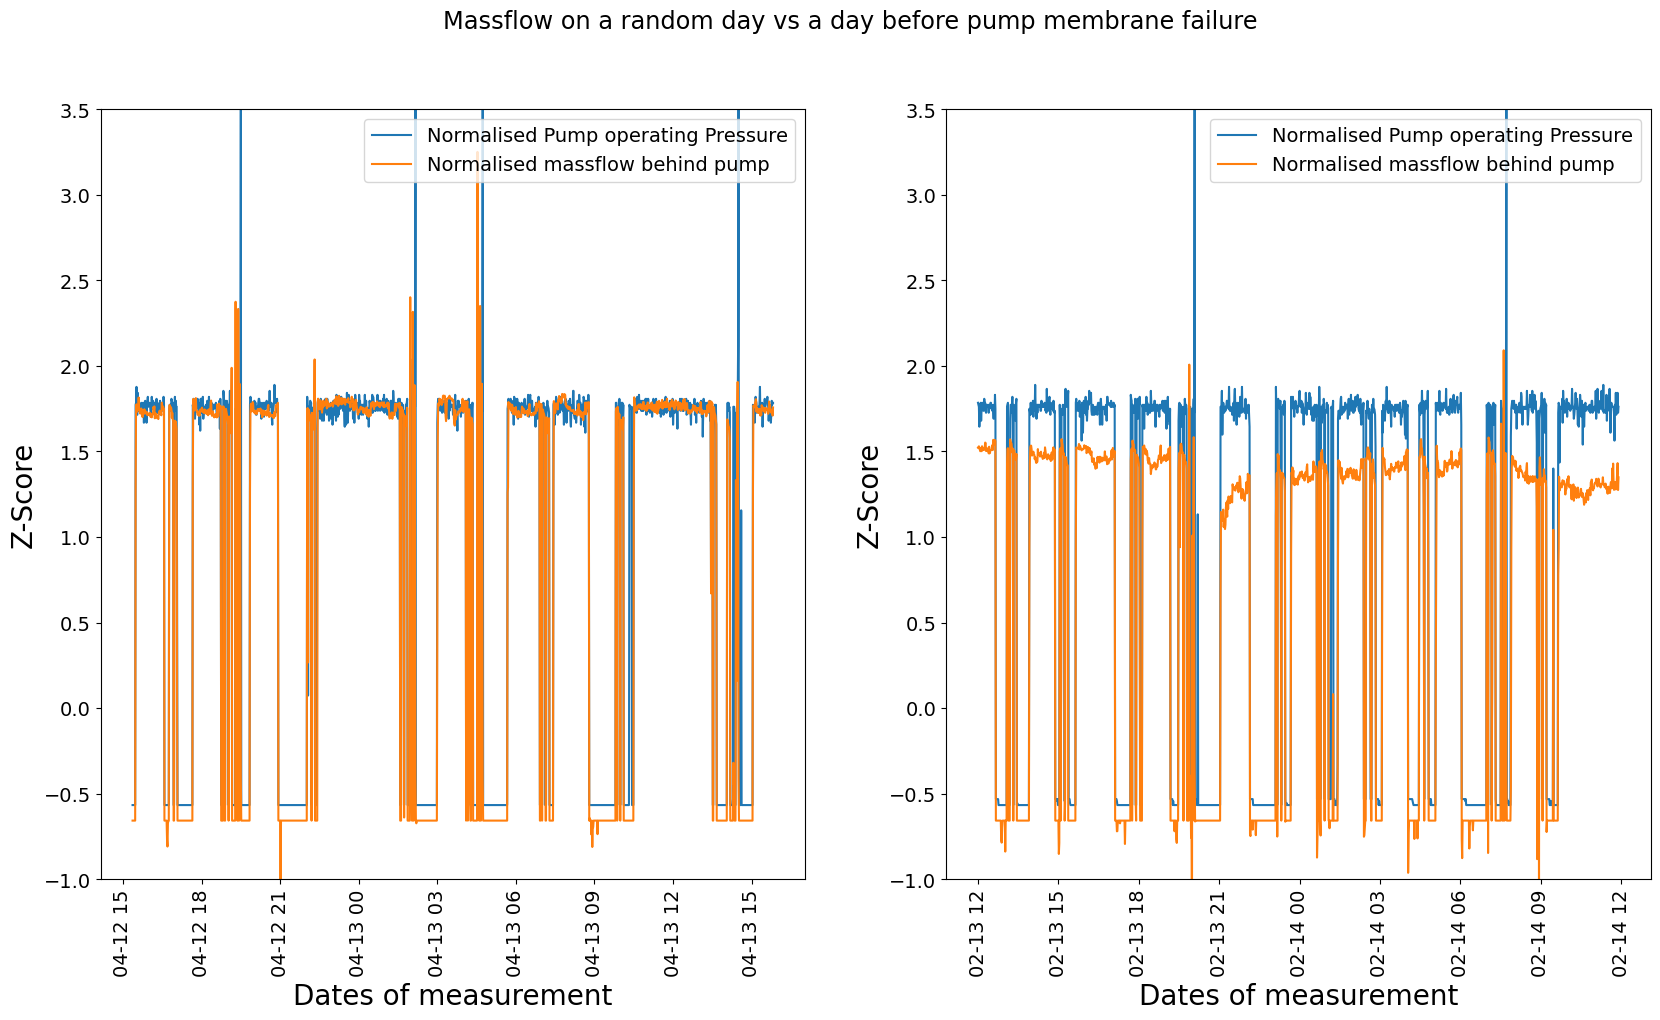

In [17]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,13,15,50)

datefeb1=datetime.datetime(2023,2,13,12,0)
datefeb2=datetime.datetime(2023,2,14,11,55)

# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%m/%d/%Y")
date2_str=date2.strftime("%m/%d/%Y")

datefeb1_str=datefeb1.strftime("%m/%d/%Y")
datefeb2_str=datefeb2.strftime("%m/%d/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)

data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]])
#ax[0].set_title(title1,fontsize=20)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'],fontsize=14)
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].tick_params(axis='both', labelsize=14)
ax[0].yaxis.label.set_size(20)
ax[0].xaxis.label.set_size(20)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_FIT301.61MF'][indfeb1[0]:indfeb2[0]])
#ax[1].set_title(title2,fontsize=20)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='both', labelsize=14)
ax[1].yaxis.label.set_size(20)
ax[1].xaxis.label.set_size(20)
ax[1].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'],fontsize=14)

plt.suptitle('Massflow on a random day vs a day before pump membrane failure', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_norm',bbox_inches="tight")

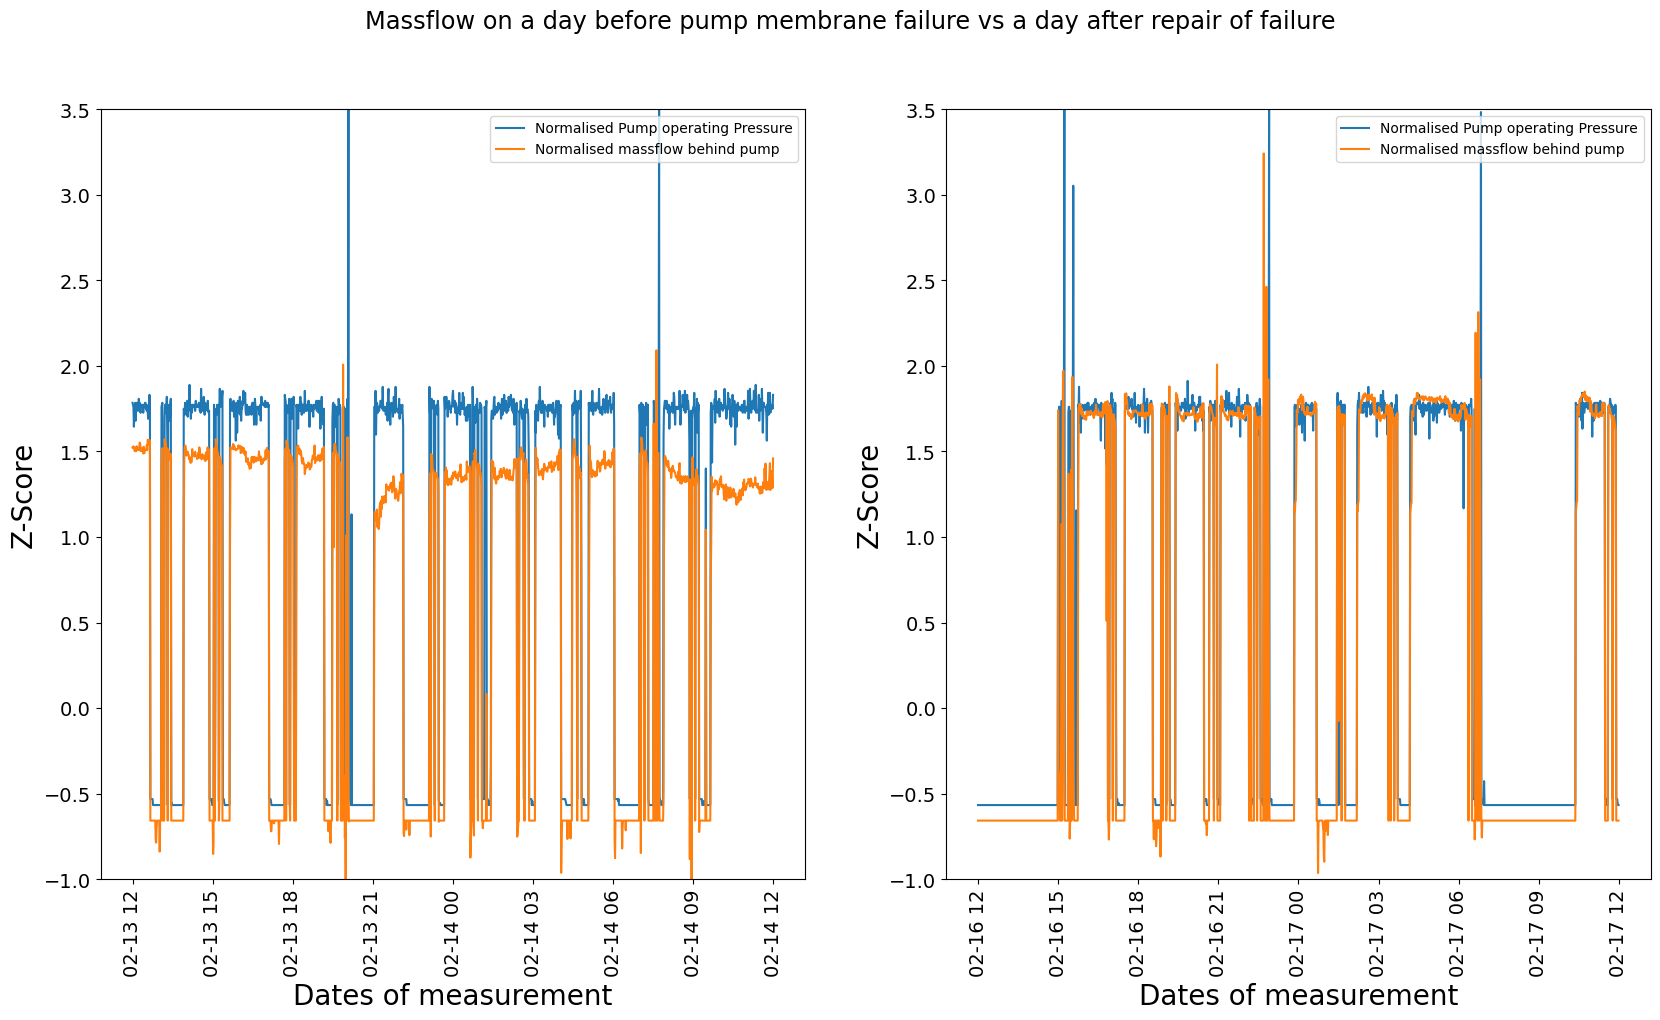

In [18]:
date1=datetime.datetime(2023,2,13,12,0)
date2=datetime.datetime(2023,2,14,12,0)

datefeb1=datetime.datetime(2023,2,16,12,0)
datefeb2=datetime.datetime(2023,2,17,12,0)

# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%m/%d/%Y")
date2_str=date2.strftime("%m/%d/%Y")

datefeb1_str=datefeb1.strftime("%m/%d/%Y")
datefeb2_str=datefeb2.strftime("%m/%d/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)

data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]])
#ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].tick_params(axis='both', labelsize=14)
ax[0].yaxis.label.set_size(20)
ax[0].xaxis.label.set_size(20)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_FIT301.61MF'][indfeb1[0]:indfeb2[0]])
#ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='both', labelsize=14)
ax[1].yaxis.label.set_size(20)
ax[1].xaxis.label.set_size(20)
ax[1].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])

plt.suptitle('Massflow on a day before pump membrane failure vs a day after repair of failure', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_after_repair',bbox_inches="tight")

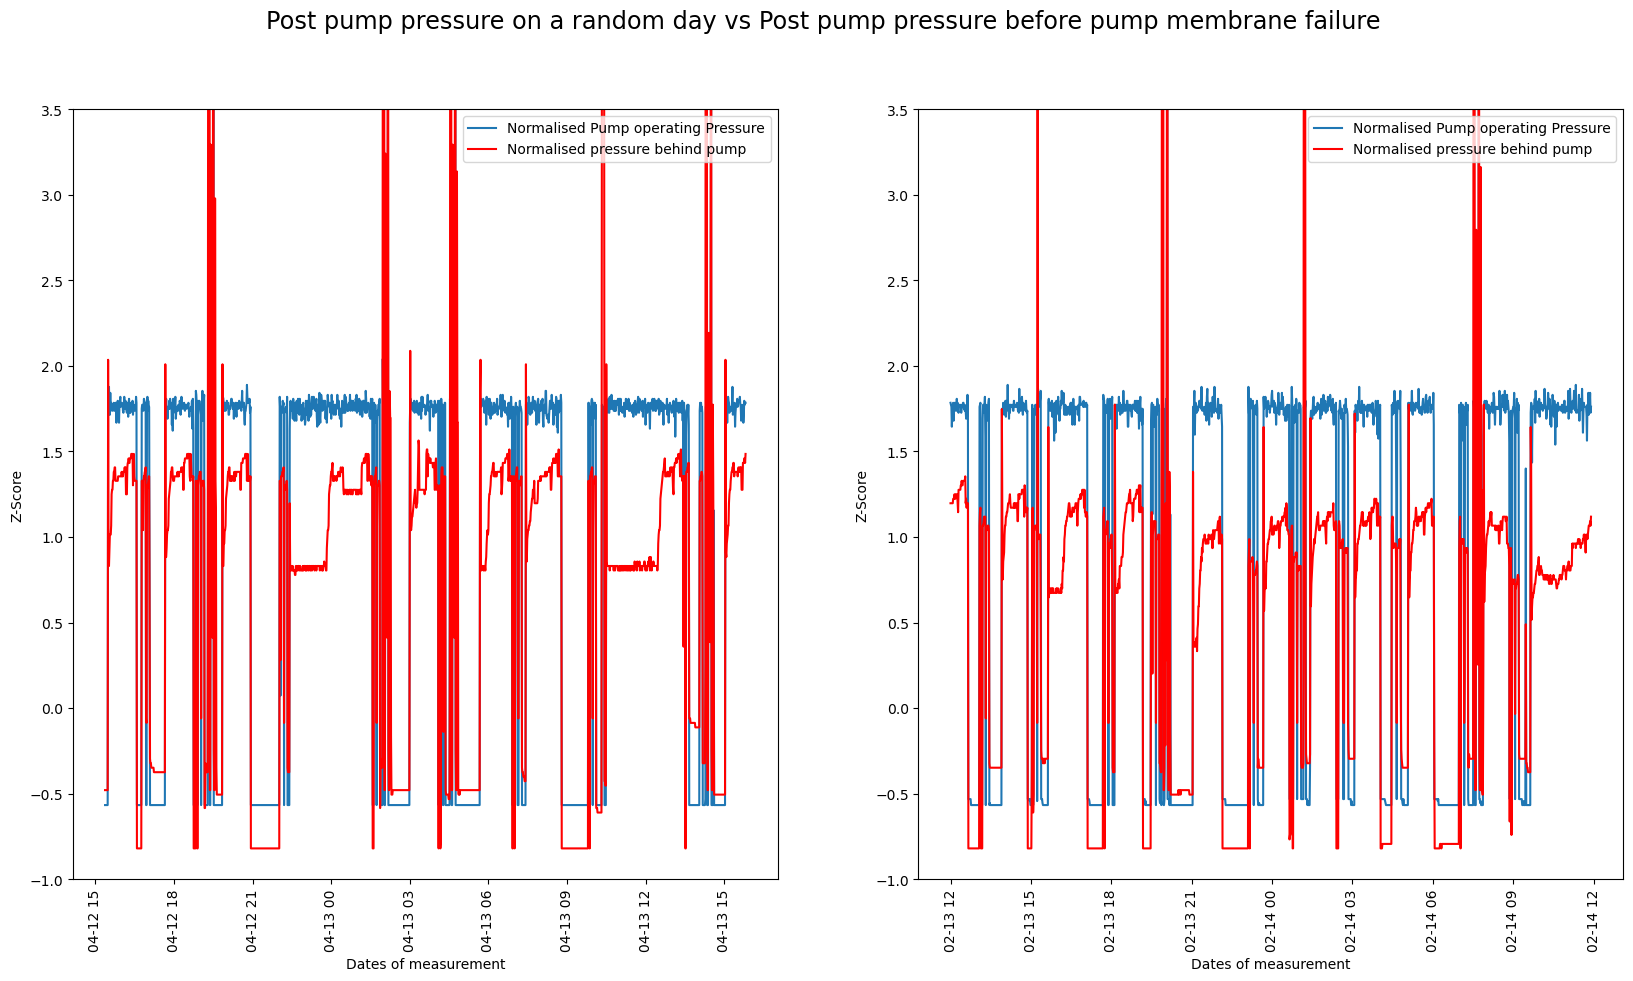

In [19]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,13,15,50)

datefeb1=datetime.datetime(2023,2,13,12,0)
datefeb2=datetime.datetime(2023,2,14,11,55)

# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%d/%m/%Y")
date2_str=date2.strftime("%d/%m/%Y")

datefeb1_str=datefeb1.strftime("%d/%m/%Y")
datefeb2_str=datefeb2.strftime("%d/%m/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)


data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],'r')
#ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised pressure behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_PIT 301.55'][indfeb1[0]:indfeb2[0]],'r')
#ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(['Normalised Pump operating Pressure','Normalised pressure behind pump'])

plt.suptitle('Post pump pressure on a random day vs Post pump pressure before pump membrane failure', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_norm')

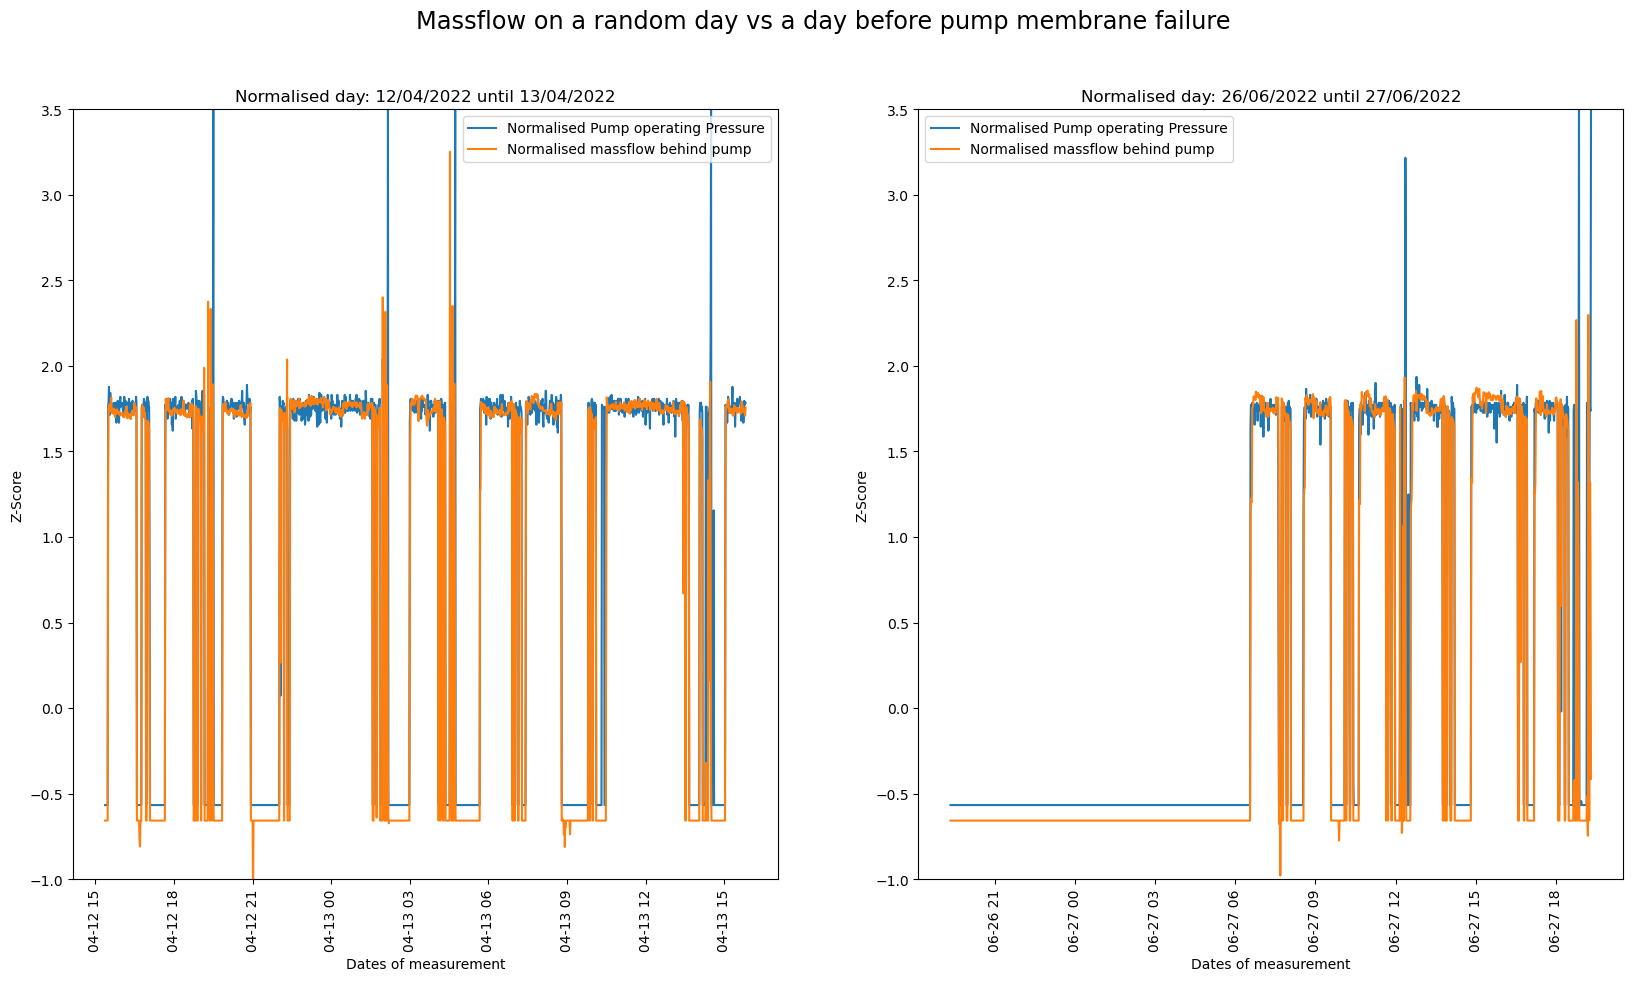

In [20]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,13,15,50)

datefeb1=datetime.datetime(2022,6,26,19,20)
datefeb2=datetime.datetime(2022,6,27,19,20)

# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%d/%m/%Y")
date2_str=date2.strftime("%d/%m/%Y")

datefeb1_str=datefeb1.strftime("%d/%m/%Y")
datefeb2_str=datefeb2.strftime("%d/%m/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)

data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]])
ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_FIT301.61MF'][indfeb1[0]:indfeb2[0]])
ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])

plt.suptitle('Massflow on a random day vs a day before pump membrane failure', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_norm')

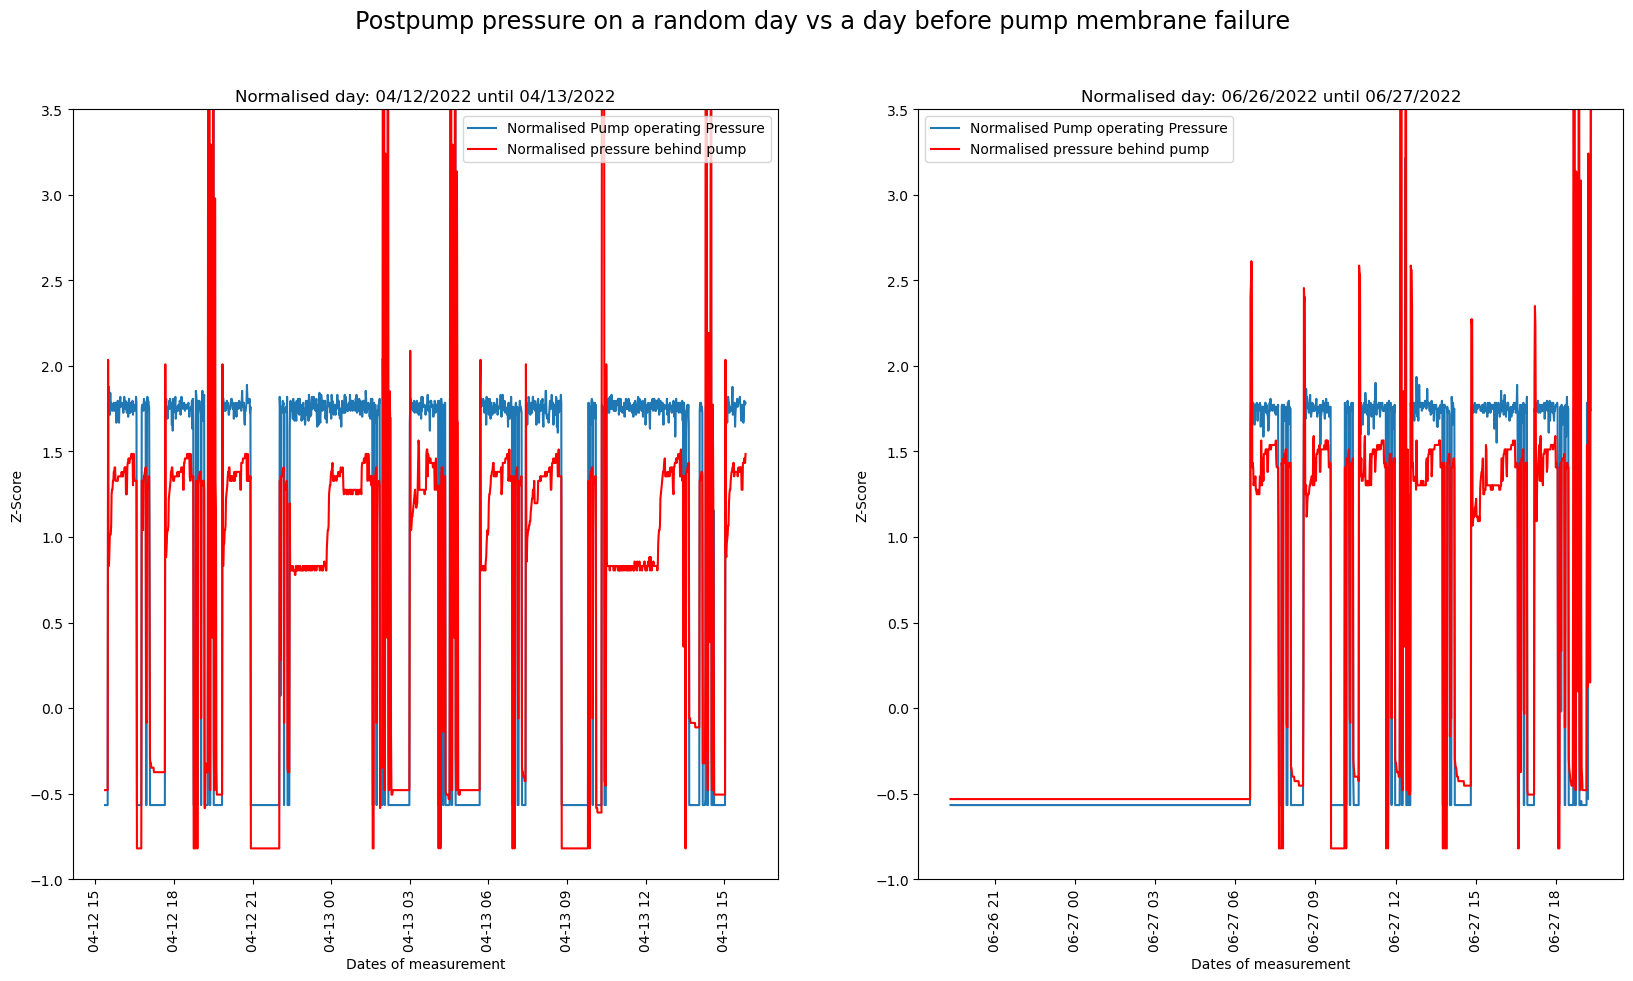

In [21]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,13,15,50)

datefeb1=datetime.datetime(2022,6,26,19,20)
datefeb2=datetime.datetime(2022,6,27,19,20)


# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%m/%d/%Y")
date2_str=date2.strftime("%m/%d/%Y")

datefeb1_str=datefeb1.strftime("%m/%d/%Y")
datefeb2_str=datefeb2.strftime("%m/%d/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)


data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],'r')
ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised pressure behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_PIT 301.55'][indfeb1[0]:indfeb2[0]],'r')
ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(['Normalised Pump operating Pressure','Normalised pressure behind pump'])

plt.suptitle('Postpump pressure on a random day vs a day before pump membrane failure', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_norm')

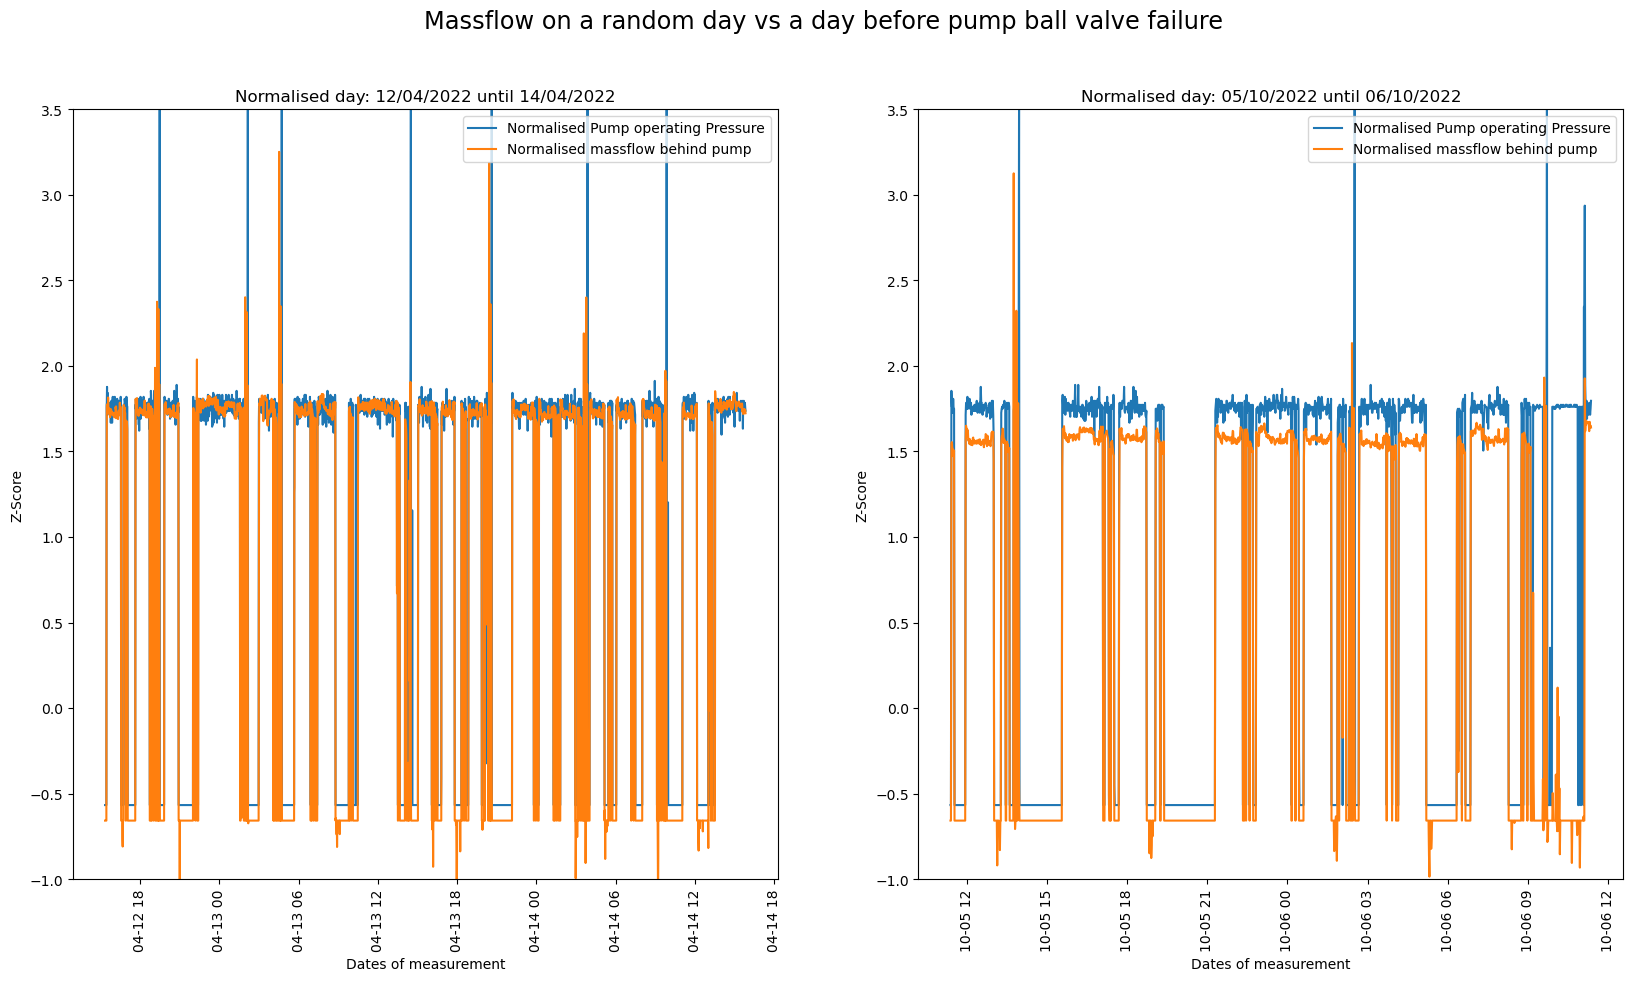

In [22]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,14,15,50)

datefeb1=datetime.datetime(2022,10,5,11,23)
datefeb2=datetime.datetime(2022,10,6,11,23)

# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%d/%m/%Y")
date2_str=date2.strftime("%d/%m/%Y")

datefeb1_str=datefeb1.strftime("%d/%m/%Y")
datefeb2_str=datefeb2.strftime("%d/%m/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)

data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]])
ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_FIT301.61MF'][indfeb1[0]:indfeb2[0]])
ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])

plt.suptitle('Massflow on a random day vs a day before pump ball valve failure', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_norm')

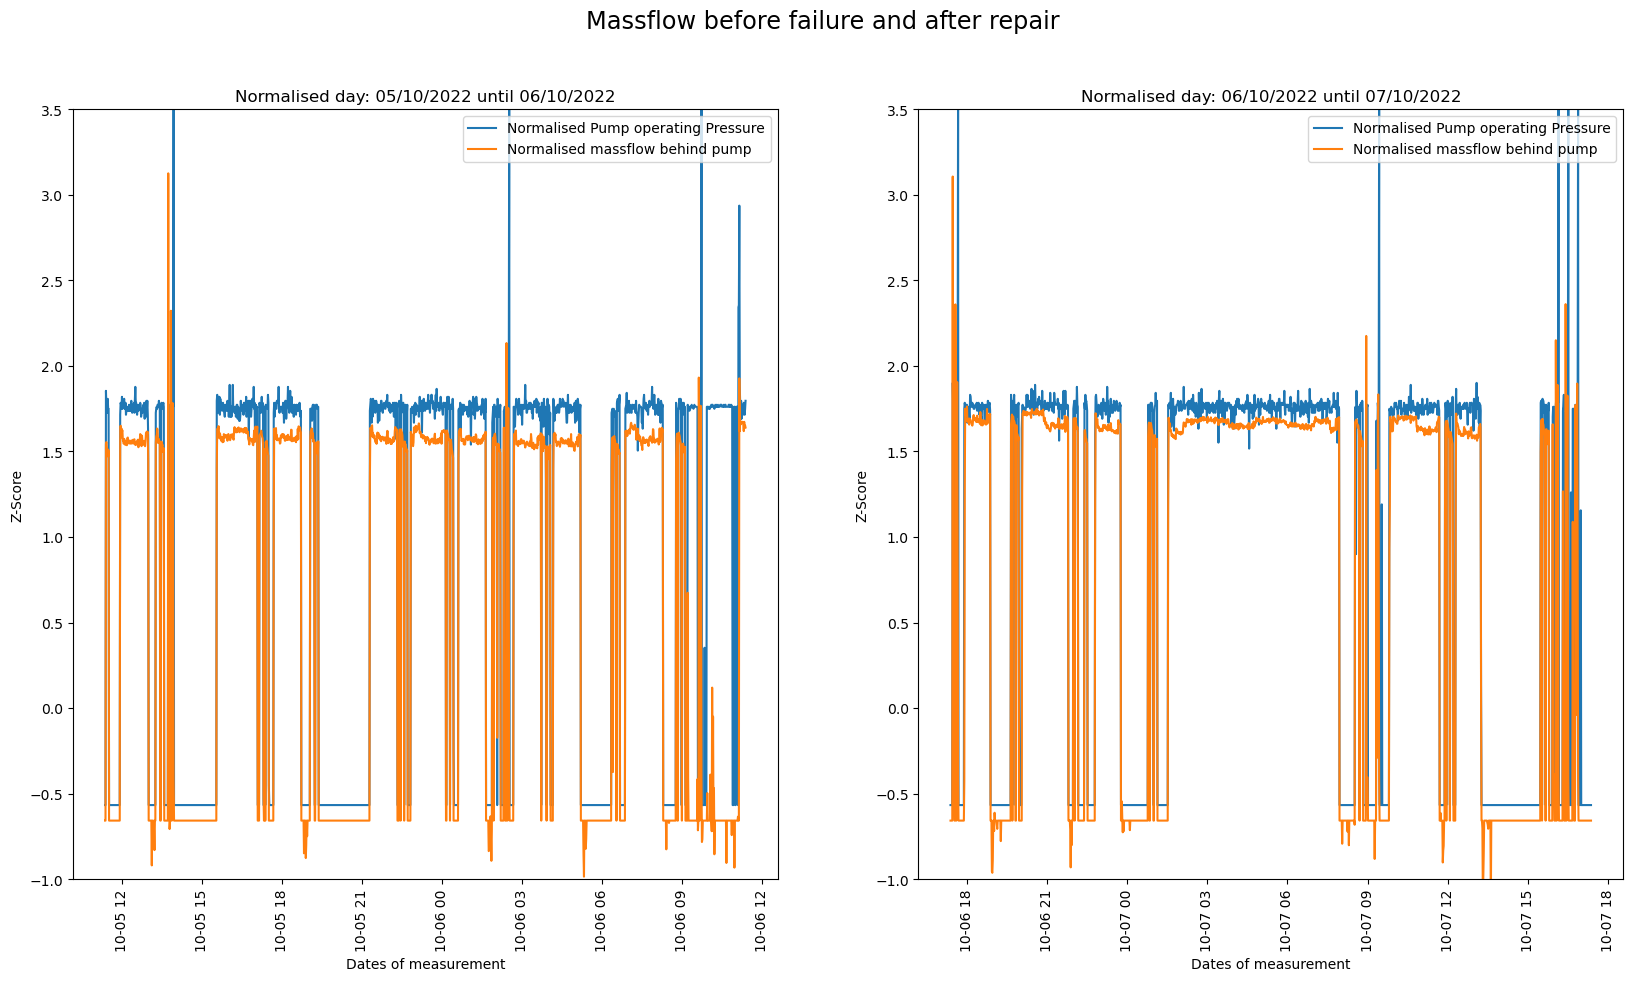

In [23]:
date1=datetime.datetime(2022,10,5,11,23)
date2=datetime.datetime(2022,10,6,11,23)

datefeb1=datetime.datetime(2022,10,6,17,23)
datefeb2=datetime.datetime(2022,10,7,17,23)

# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%d/%m/%Y")
date2_str=date2.strftime("%d/%m/%Y")

datefeb1_str=datefeb1.strftime("%d/%m/%Y")
datefeb2_str=datefeb2.strftime("%d/%m/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)

data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]])
ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_FIT301.61MF'][indfeb1[0]:indfeb2[0]])
ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])

plt.suptitle('Massflow before failure and after repair', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_norm')

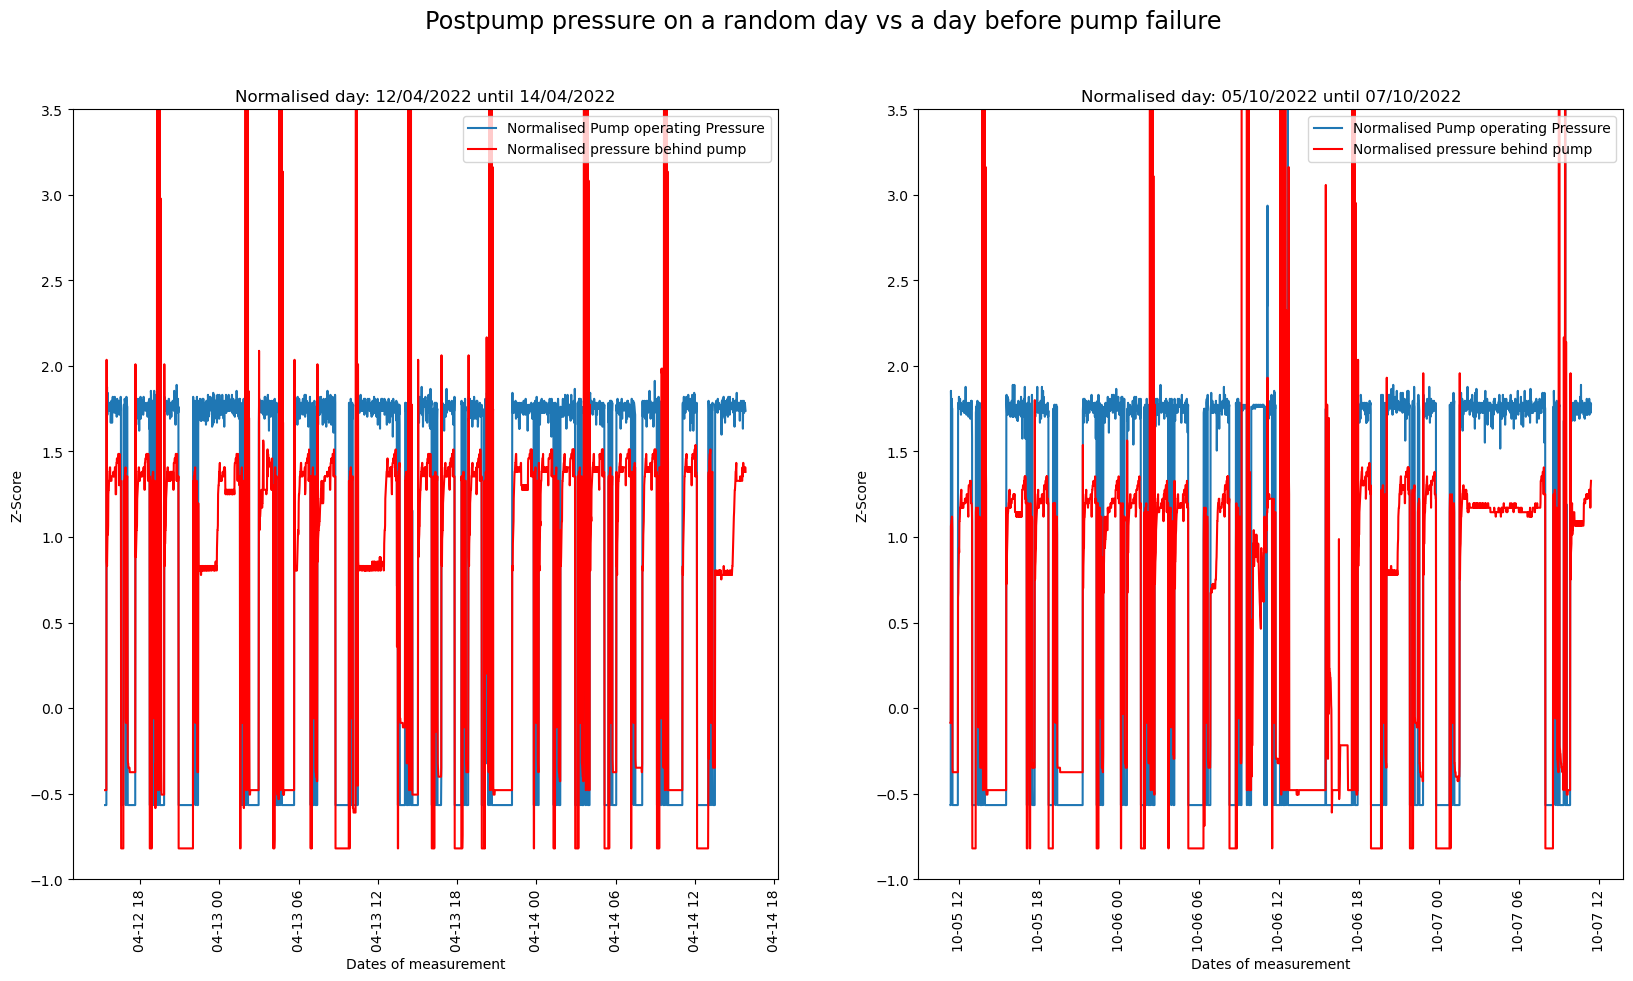

In [24]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,14,15,50)

datefeb1=datetime.datetime(2022,10,5,11,23)
datefeb2=datetime.datetime(2022,10,7,11,23)



# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%d/%m/%Y")
date2_str=date2.strftime("%d/%m/%Y")

datefeb1_str=datefeb1.strftime("%d/%m/%Y")
datefeb2_str=datefeb2.strftime("%d/%m/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)


data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],'r')
ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised pressure behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_PIT 301.55'][indfeb1[0]:indfeb2[0]],'r')
ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(['Normalised Pump operating Pressure','Normalised pressure behind pump'])

plt.suptitle('Postpump pressure on a random day vs a day before pump failure', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_norm')

## Compare densities
Since a membrane rupture would introduce air into the system, this might be measurable in the density.

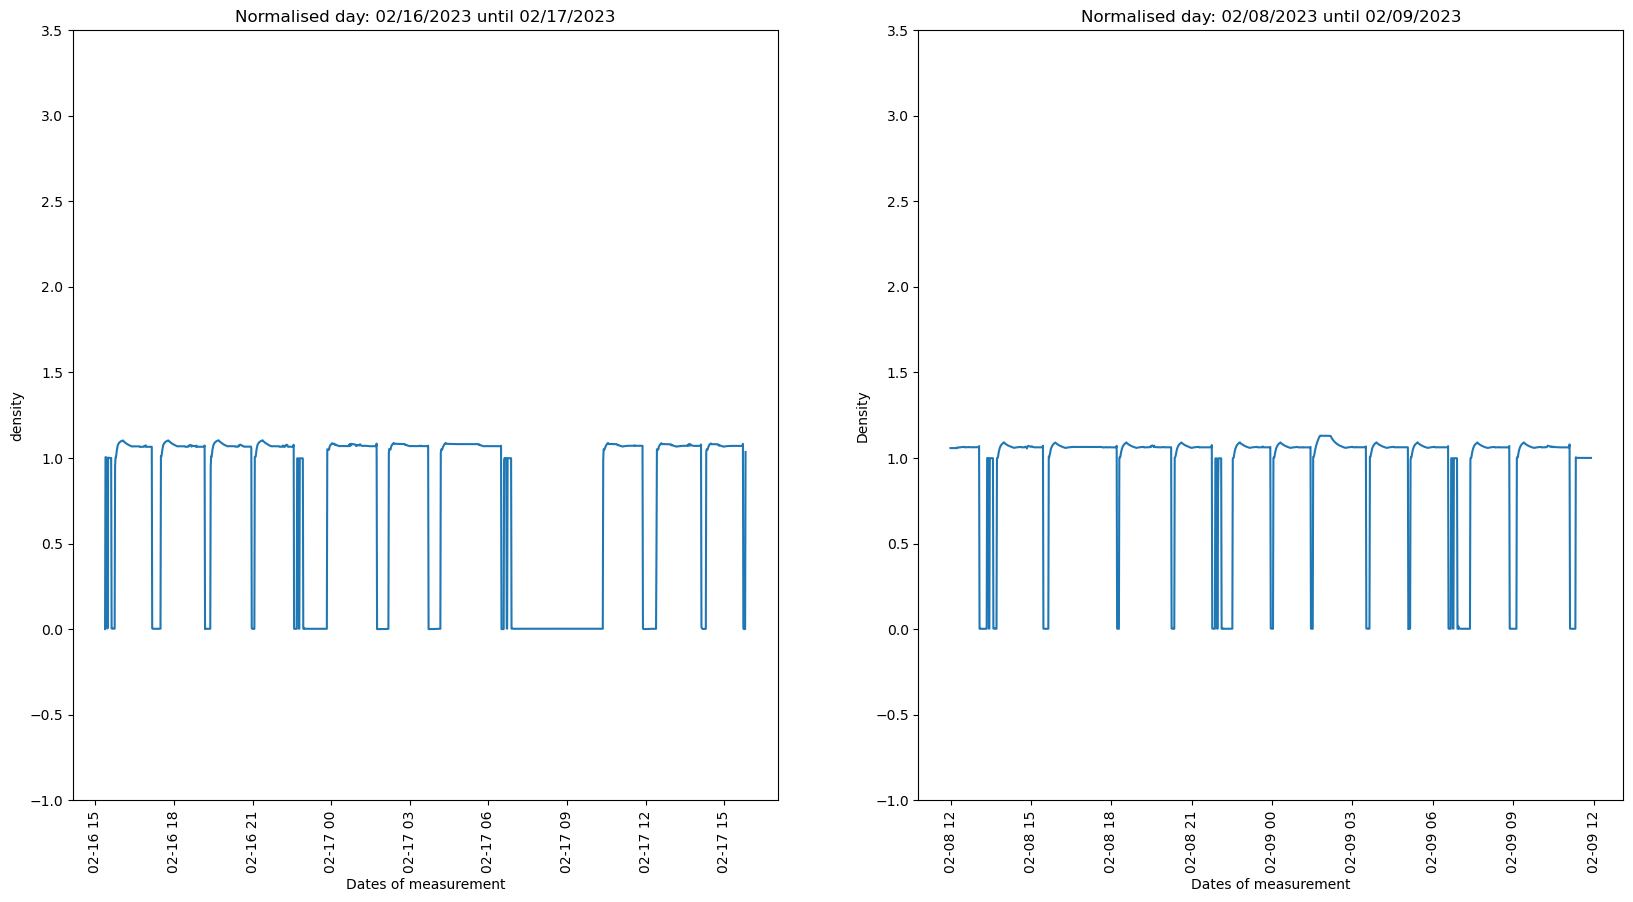

In [25]:
date1=datetime.datetime(2023,2,16,15,22)
date2=datetime.datetime(2023,2,17,15,50)

datefeb1=datetime.datetime(2023,2,8,12,0)
datefeb2=datetime.datetime(2023,2,9,11,55)

# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%m/%d/%Y")
date2_str=date2.strftime("%m/%d/%Y")

datefeb1_str=datefeb1.strftime("%m/%d/%Y")
datefeb2_str=datefeb2.strftime("%m/%d/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)

data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],data['5IAL_3_FIT301.61D'][ind1[0]:ind2[0]])
ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('density')
ax[0].set_ylim(-1, 3.5)

ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],data['5IAL_3_FIT301.61D'][indfeb1[0]:indfeb2[0]])
ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Density')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)


fig.savefig('/kaggle/working/flow_norm')

# Recent data
Check recent data for possible inement breakdowns.

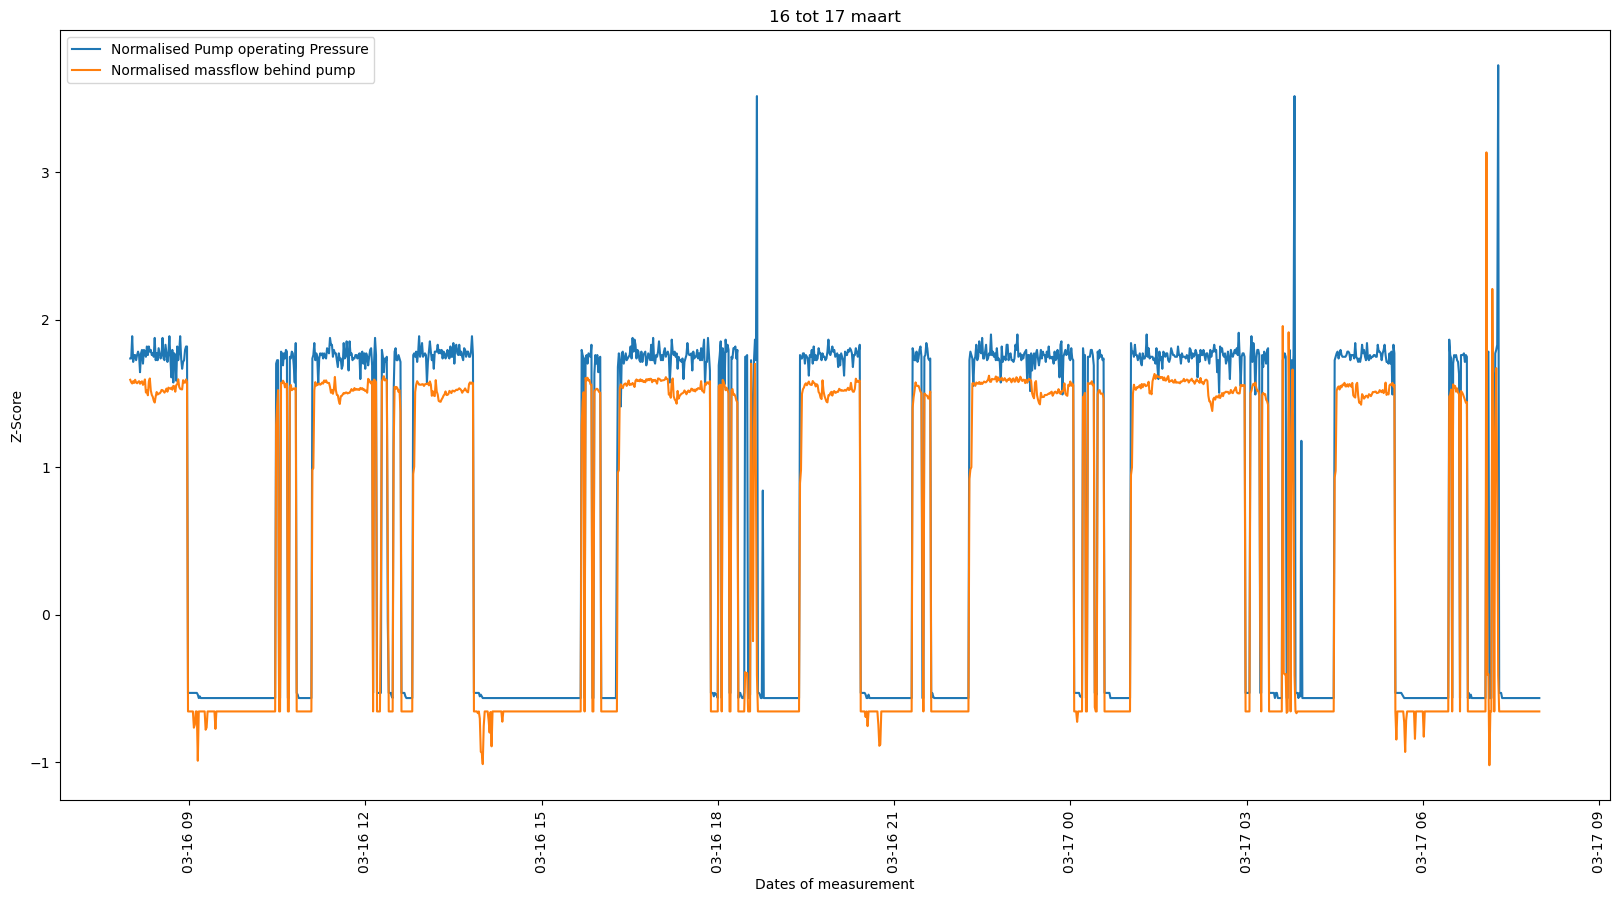

In [26]:
plt.figure(figsize=(20,10))
plt.plot(data_17['0'],data_17['press_norm'],data_17['0'],data_17['flow_norm'])
plt.title('16 tot 17 maart')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('Dates of measurement')
plt.ylabel('Z-Score')
plt.legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])


0.9997198330676074


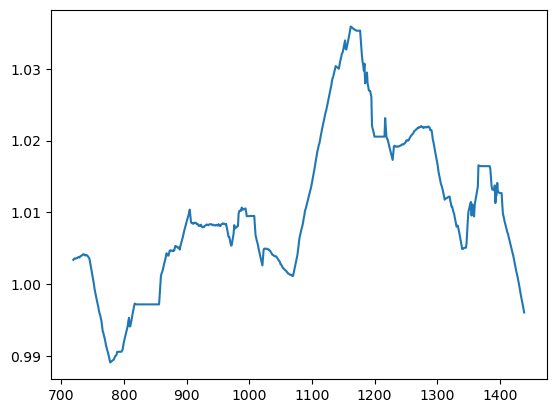

In [27]:
data_17['frac']=data_17['press_norm']/data_17['flow_norm']

                        
data_17['frac']= (abs(data_17['frac']) < 3) * data_17['frac']
#data['frac']= (norm['frac'] > 0) * norm['frac']
                                             
print(data_17['frac'].mean())

data_17['frac'] = data_17['frac'].rolling(60*12).mean()
                        
                        
plt.plot(data_17['frac'])

## check how much lower the flow actually is compared to normal 


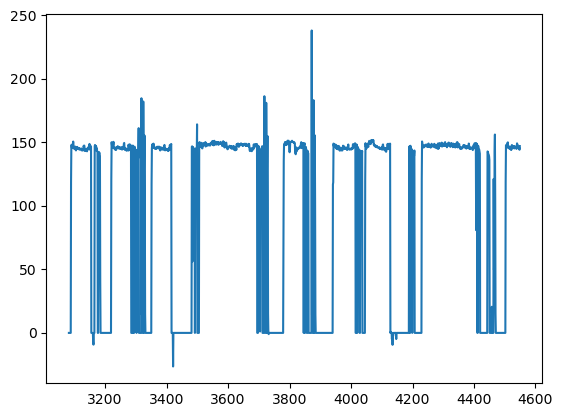

In [28]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,13,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]


plt.plot(data['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]])

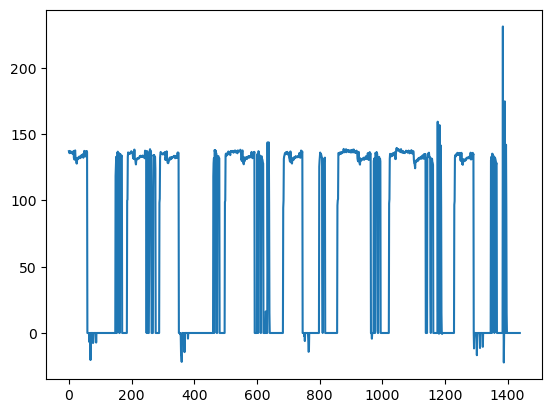

In [29]:
plt.plot(data_17['5IAL_3_FIT301.61MF'])

# Negative Pressure
hierbij is opvallend dat wanneer de pomp uit staat en de low level switch uit, dan is er een onderdruk in de leiding achter de pomp

(-0.2, 3.0)

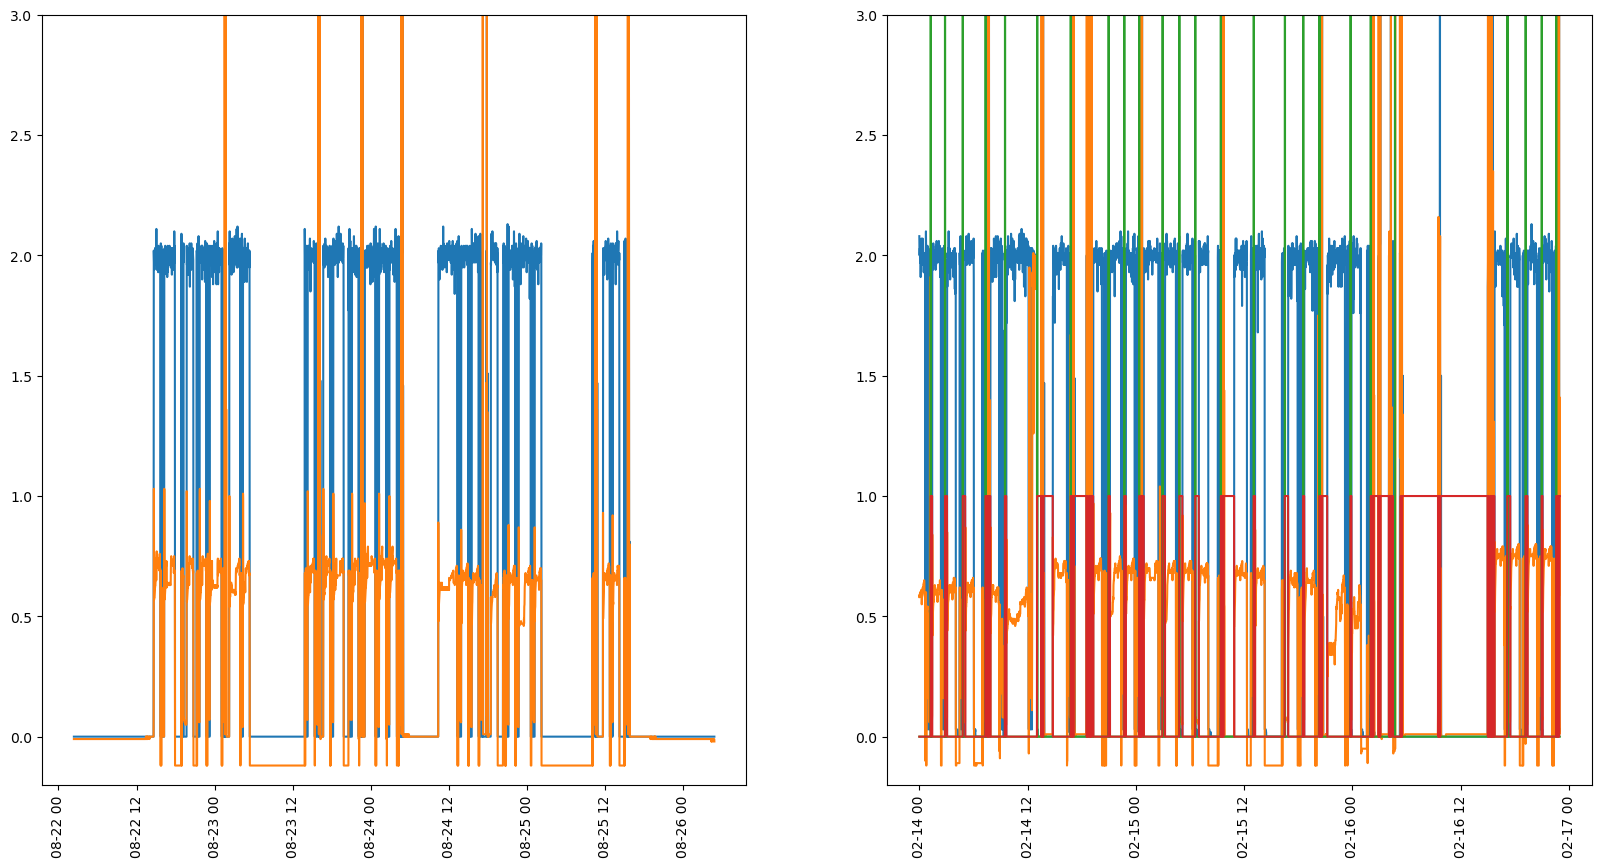

In [30]:
date1=datetime.datetime(2022,8,22,2,22)
date2=datetime.datetime(2022,8,26,4,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

fig, ax=plt.subplots(1,2,figsize=(20,10))


ax[0].plot(data['Date'][ind1[0]:ind2[0]] , data['5IAL_3_P301.70'][ind1[0]:ind2[0]],data['Date'][ind1[0]:ind2[0]],data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]])
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylim([-0.2,3])



date1=datetime.datetime(2023,2,14,0,0)
date2=datetime.datetime(2023,2,16,23,0)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]


ax[1].plot( data['Date'][ind1[0]:ind2[0]],data['5IAL_3_P301.70'][ind1[0]:ind2[0]],data['Date'][ind1[0]:ind2[0]],data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],data['Date'][ind1[0]:ind2[0]],data['5IAL_3_P301.72'][ind1[0]:ind2[0]],data['Date'][ind1[0]:ind2[0]],data['5IAL_3_LSL301.53'][ind1[0]:ind2[0]])
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylim([-0.2,3])

## Negative Pressure in the process
This plot shows that a negative pressure is repeatatly made when the vessel is full. This seems to be baked into the software, though not neccecaraly bad i have not been able to locate its cause. Ofcourse in an ideal world this pressure would be 0

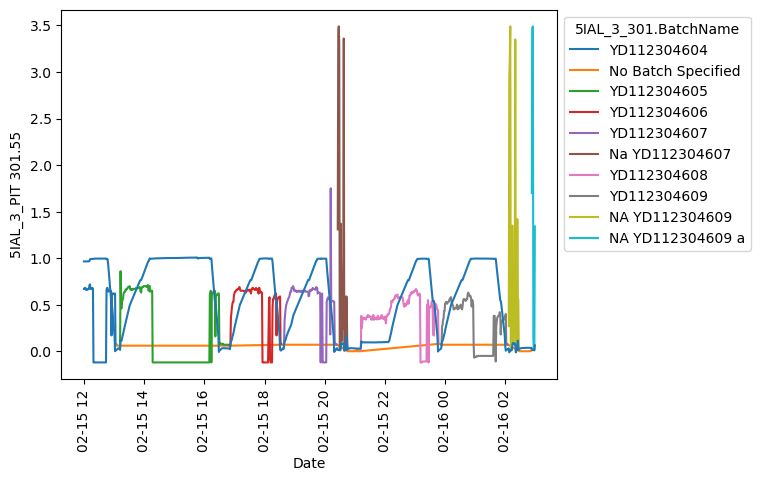

In [31]:
import seaborn as sns


date1=datetime.datetime(2023,2,15,12,0)
date2=datetime.datetime(2023,2,16,3,0)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

ax = sns.lineplot(x=data['Date'][ind1[0]:ind2[0]],y=data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],hue=data['5IAL_3_301.BatchName'][ind1[0]:ind2[0]])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_LIT301.54'][ind1[0]:ind2[0]]/100))
plt.tick_params(axis='x', labelrotation=90)

# Cleaning process Analysis
Looking at the suspioen that CIP might be destroying the membranes.

## Singel full demi cleaning procedure
Should be noted that the pressure after the pump (PIT 55) can reach up to 3.5 bars. However when the pump opperates with 2 bar of driving pressure, it only produces about 0.7 bar of pressure. This means there must be an external pressure source, this ofcourse being the CIP pump. The Membrane pump however can not handle any postive suction pressure.

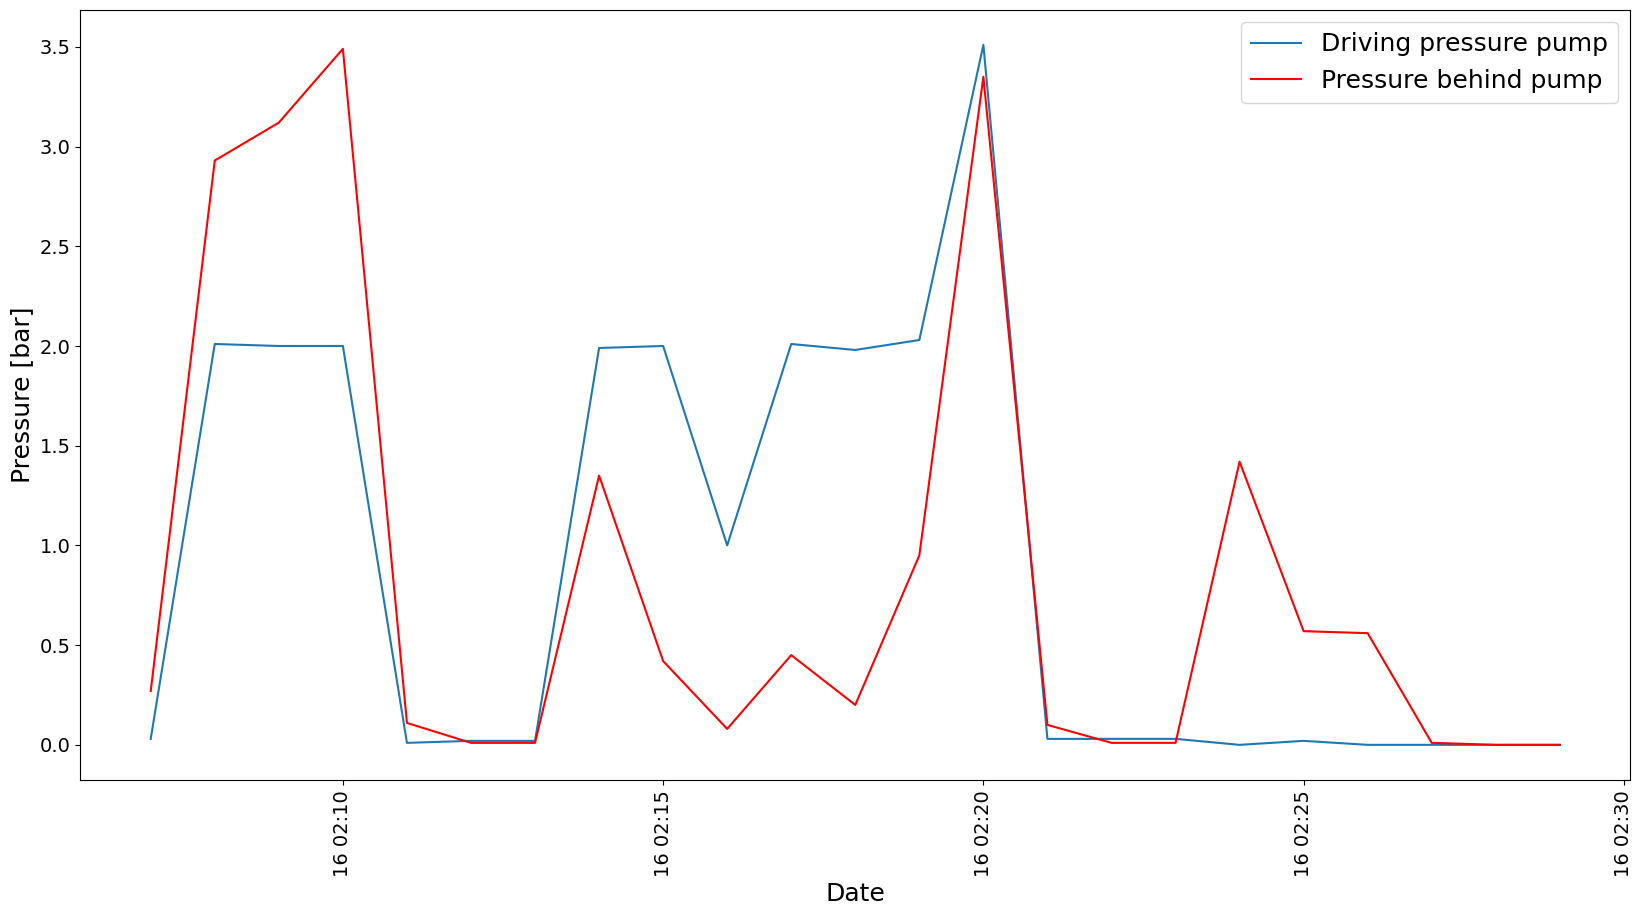

In [32]:
date1=datetime.datetime(2023,2,16,2,7)
date2=datetime.datetime(2023,2,16,2,30)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

plt.figure(figsize=(20,10))
plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_P301.70'][ind1[0]:ind2[0]]))
plt.plot(data['Date'][ind1[0]:ind2[0]],data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],'r')




plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Pressure [bar]', fontsize=18)

plt.tick_params(axis='both', labelsize=14)


plt.legend(['Driving pressure pump' , 'Pressure behind pump'], fontsize=18)

plt.savefig('plaatje_demi',bbox_inches="tight")

plt.show()



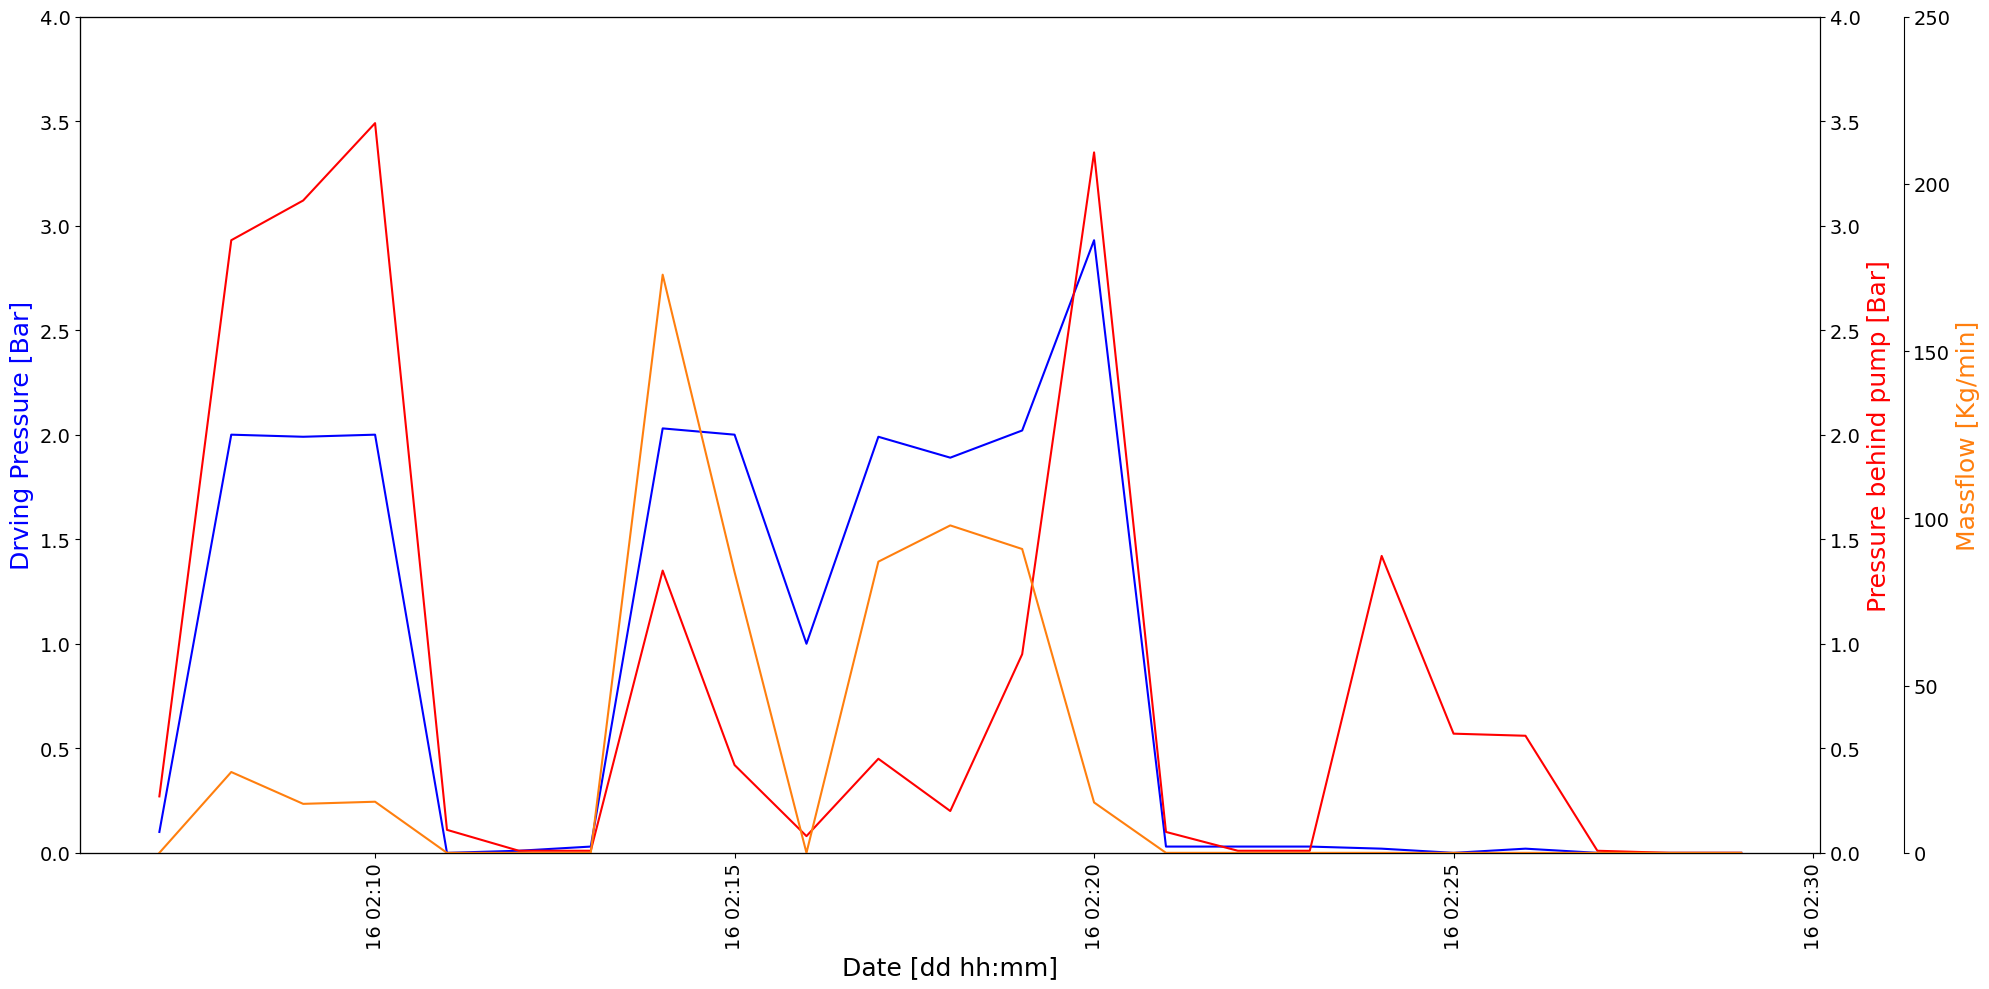

In [33]:
date1=datetime.datetime(2023,2,16,2,7)
date2=datetime.datetime(2023,2,16,2,30)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]


# More versatile wrapper
fig, host = plt.subplots(figsize=(20,10)) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()

    
# host.set_xlim(0, 2)
host.set_ylim(0, 4)
par1.set_ylim(0, 4)
par2.set_ylim(0, 250)

    
host.set_xlabel("Date [dd hh:mm]",fontsize=18)
host.set_ylabel("Drving Pressure [Bar]",fontsize=18)
par1.set_ylabel("Pressure behind pump [Bar]",fontsize=18)
par2.set_ylabel("Massflow [Kg/min]",fontsize=18)

host.tick_params(axis='x', labelrotation=90)
host.tick_params(axis='both', labelsize=14)
par1.tick_params(axis='both', labelsize=14)
par2.tick_params(axis='both', labelsize=14)

color1 = 'b'
color2 = 'r'
color3 = 'tab:orange'


p1, = host.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_XPV301.13'][ind1[0]:ind2[0]]) ,    color=color1, label="Driving Pressure [Bar]")
p2, = par1.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]]) ,    color=color2, label="Pressure behind Pump [Bar]")
p3, = par2.plot(data['Date'][ind1[0]:ind2[0]] , (data['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]]) , color=color3, label="Massflow [Kg/min]")


lns = [p1, p2, p3]
#host.legend(handles=lns, loc='best')


# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))


# no x-ticks                 
#par2.xaxis.set_ticks([])
#par3.xaxis.set_ticks([])

# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')





host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())


# Adjust spacings w.r.t. figsize
fig.tight_layout()
# Alternatively: bbox_inches='tight' within the plt.savefig function 
#                (overwrites figsize)


# Best for professional typesetting, e.g. LaTeX
plt.savefig("pyplot_multiple_y-axis.png",bbox_inches="tight")
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=200)'

['0', '5IAL_3_PC601.70FSP','5IAL_3_PC601.70PSP']

## Using demi cleaning procces data
In this scction CIP Satelite data is combined with that of the 301 module. This however doesnt seem to indicate a whole lot. This section is left if one were to explore this further

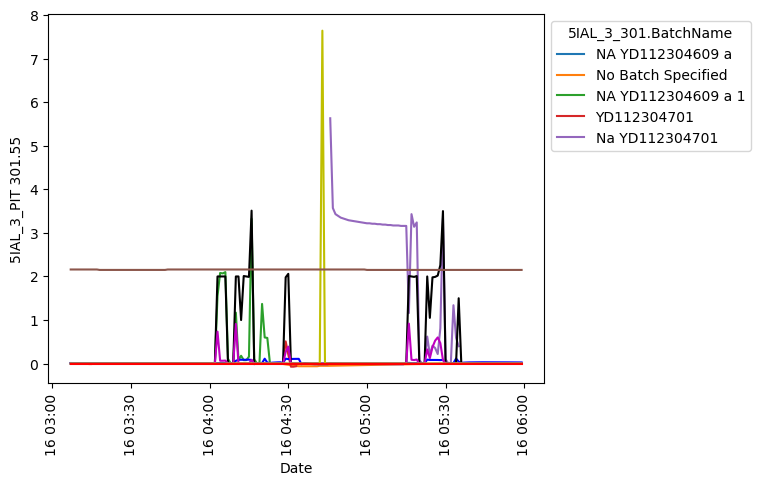

In [34]:
import seaborn as sns


date1=datetime.datetime(2023,2,16,3,7)
date2=datetime.datetime(2023,2,16,6,0)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

ax = sns.lineplot(x=data['Date'][ind1[0]:ind2[0]],y=data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],hue=data['5IAL_3_301.BatchName'][ind1[0]:ind2[0]])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_LIT301.54'][ind1[0]:ind2[0]]/100),'b')
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_P301.70'][ind1[0]:ind2[0]]),'k')
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]]/175),'m')
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_LSL301.53'][ind1[0]:ind2[0]]/175),'tab:purple')
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_P301.72'][ind1[0]:ind2[0]]),'y')
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data_cip['0'][ind1[0]:ind2[0]],(data_cip['5IAL_3_PIT601.55'][ind1[0]:ind2[0]]),'tab:brown')
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_XPV301.43'][ind1[0]:ind2[0]]*100),'r')
plt.tick_params(axis='x', labelrotation=90)



## demi Cleaning process with valves plotted
This plot takes into account the valves that take over the pipes leading towards the pump. Strangely enough this does not seem to capture the actual CIP fluid, because this is a demi only cleaning

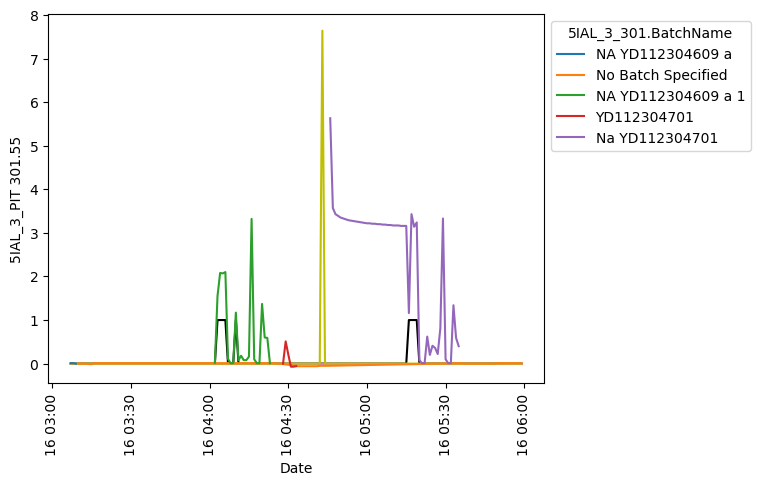

In [35]:
date1=datetime.datetime(2023,2,16,3,7)
date2=datetime.datetime(2023,2,16,6,0)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_XPV301.42'][ind1[0]:ind2[0]]),'k')
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_XPV301.43'][ind1[0]:ind2[0]]),'tab:pink')
plt.tick_params(axis='x', labelrotation=90)

plt.plot(data['Date'][ind1[0]:ind2[0]],(data['5IAL_3_P301.72'][ind1[0]:ind2[0]]),'y')
plt.tick_params(axis='x', labelrotation=90)

ax = sns.lineplot(x=data['Date'][ind1[0]:ind2[0]],y=data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],hue=data['5IAL_3_301.BatchName'][ind1[0]:ind2[0]])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tick_params(axis='x', labelrotation=90)

# Backup pump problems
After the breakdown that occured on 14-2 a backup pump was put in its place.\
However this pump did not appear to function properly so TS replaced it again with the fixed up old pump.
Lets analyse

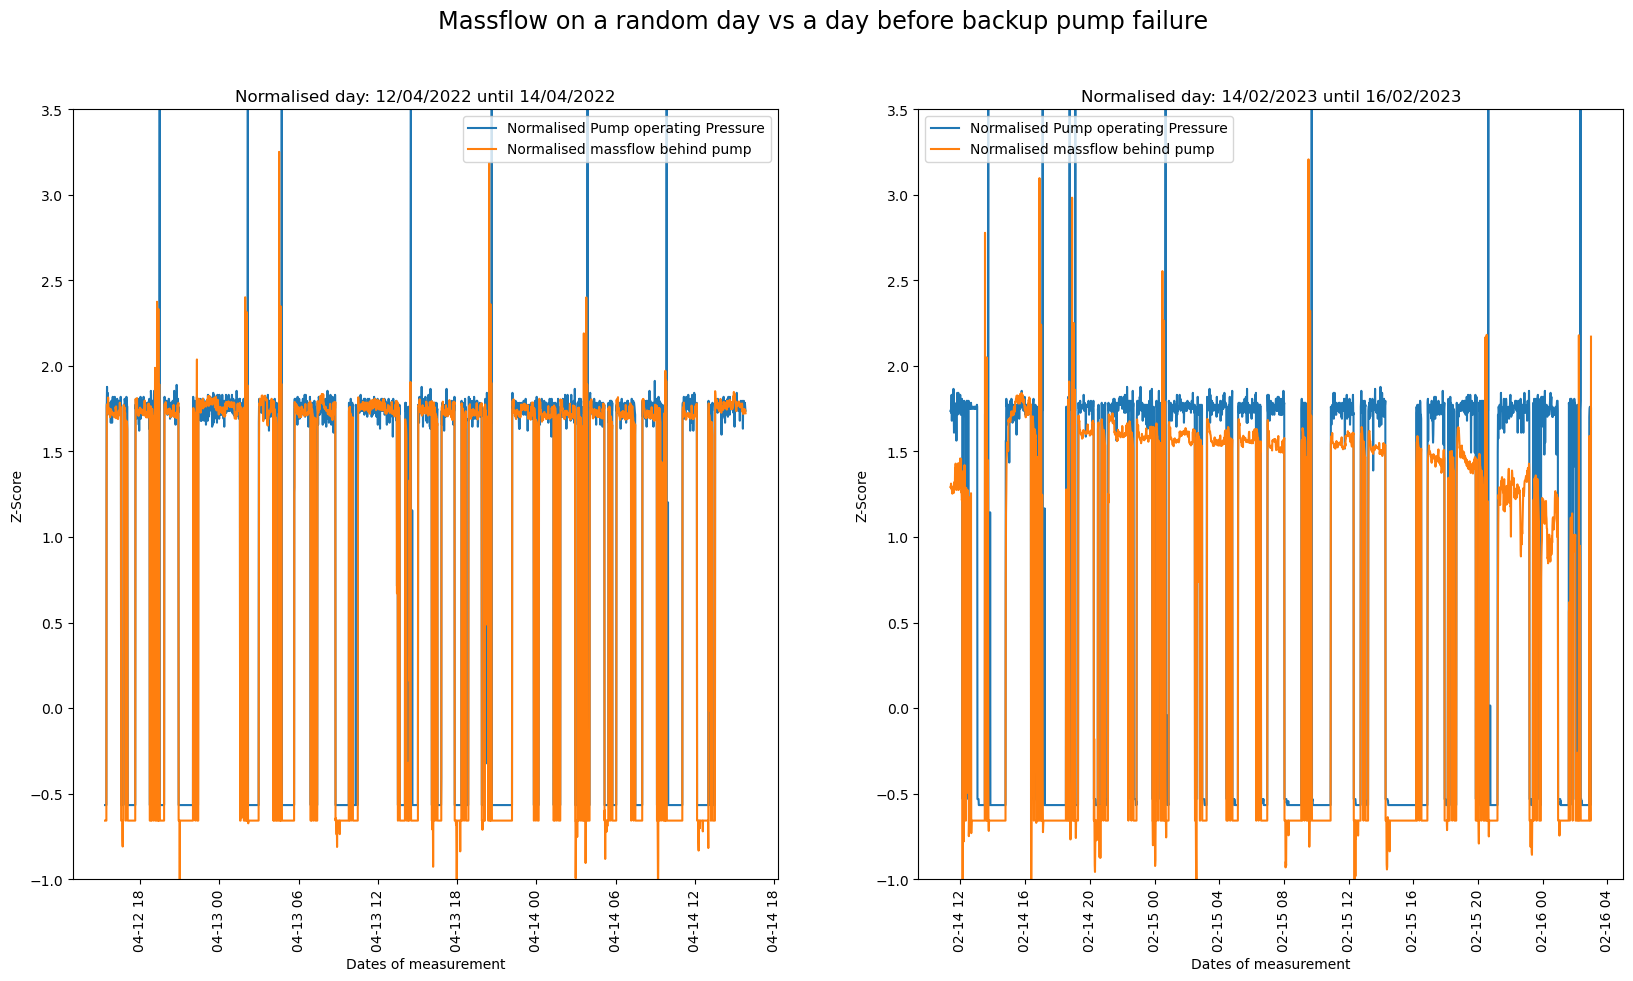

In [36]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,14,15,50)

datefeb1=datetime.datetime(2023,2,14,11,23)
datefeb2=datetime.datetime(2023,2,16,3,0)

# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%d/%m/%Y")
date2_str=date2.strftime("%d/%m/%Y")

datefeb1_str=datefeb1.strftime("%d/%m/%Y")
datefeb2_str=datefeb2.strftime("%d/%m/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)

data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]])
ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_FIT301.61MF'][indfeb1[0]:indfeb2[0]])
ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])

plt.suptitle('Massflow on a random day vs a day before backup pump failure', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_norm')

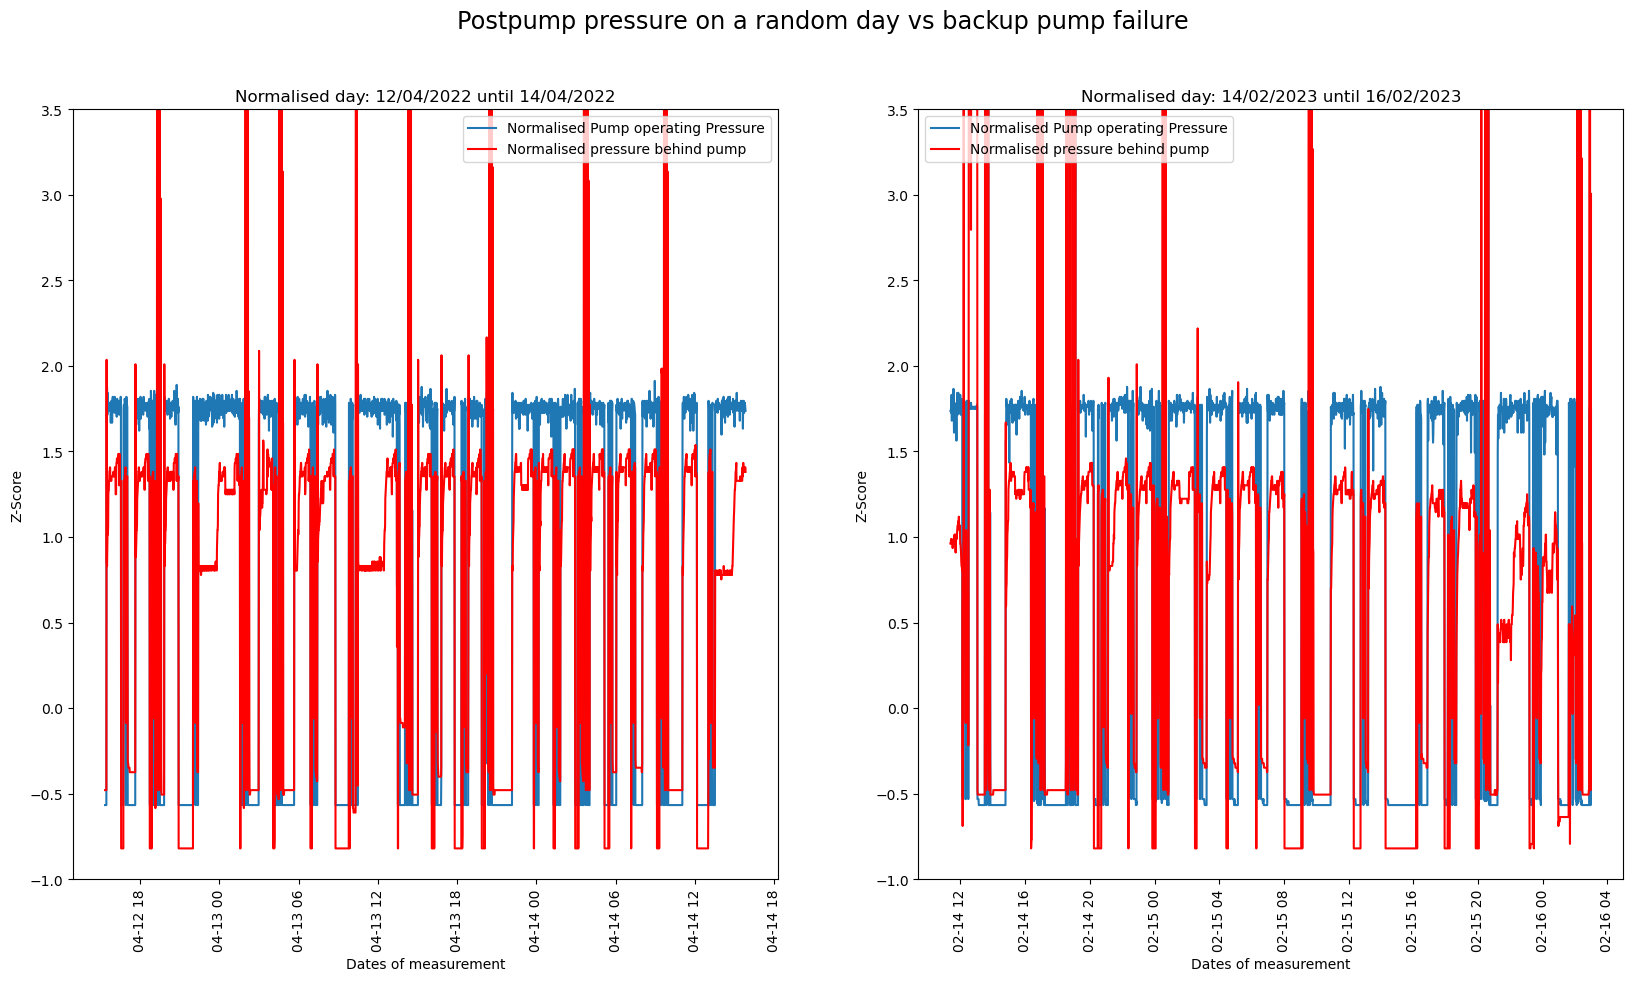

In [37]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,14,15,50)

datefeb1=datetime.datetime(2023,2,14,11,23)
datefeb2=datetime.datetime(2023,2,16,3,0)



# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%d/%m/%Y")
date2_str=date2.strftime("%d/%m/%Y")

datefeb1_str=datefeb1.strftime("%d/%m/%Y")
datefeb2_str=datefeb2.strftime("%d/%m/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)


data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],'r')
ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised pressure behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_PIT 301.55'][indfeb1[0]:indfeb2[0]],'r')
ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(['Normalised Pump operating Pressure','Normalised pressure behind pump'])

plt.suptitle('Postpump pressure on a random day vs backup pump failure', fontsize='xx-large')

fig.savefig('/kaggle/working/flow_norm')

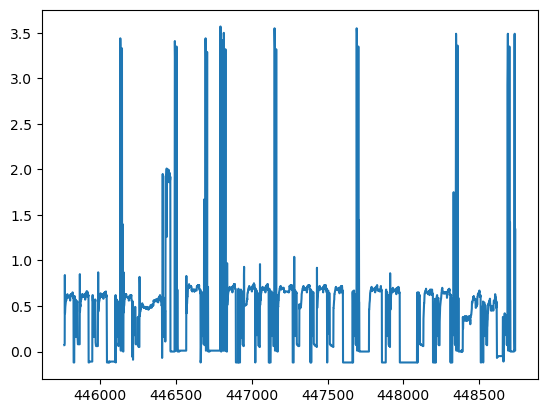

In [38]:
date1=datetime.datetime(2023,2,14,1,23)
date2=datetime.datetime(2023,2,16,3,0)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]


plt.plot(data['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]])

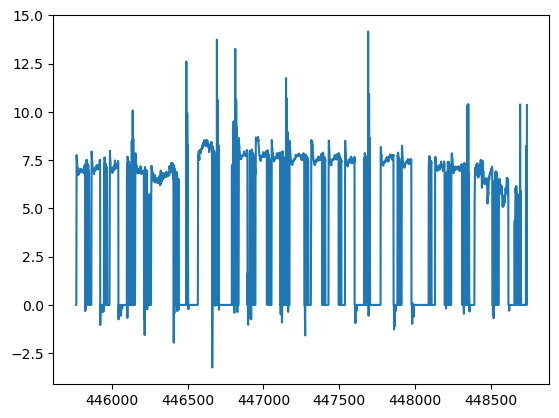

In [39]:
date1=datetime.datetime(2023,2,14,1,23)
date2=datetime.datetime(2023,2,16,3,0)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]


plt.plot(data['5IAL_3_FIT301.61VF'][ind1[0]:ind2[0]])

In [40]:
# columns=['5IAL_3_301.BatchName','Date','5IAL_3_PIT 301.55','5IAL_3_P301.70']

# data_frac=data.loc[:,columns]

# data_frac = data_frac.drop(data_frac[data_frac['5IAL_3_301.BatchName'] == 'No Batch Specified'].index)

# data_frac=data_frac.reset_index()

# norm=pd.DataFrame()
# for col in data_frac.iloc[:,2:]:
#     zval=(data_frac[col]-np.mean(data_frac[col]))/np.std(data_frac[col])
#     norm=pd.concat([norm,zval],axis=1)
    
# norm.head()


# Membrane failure

(0.0, 2.0)

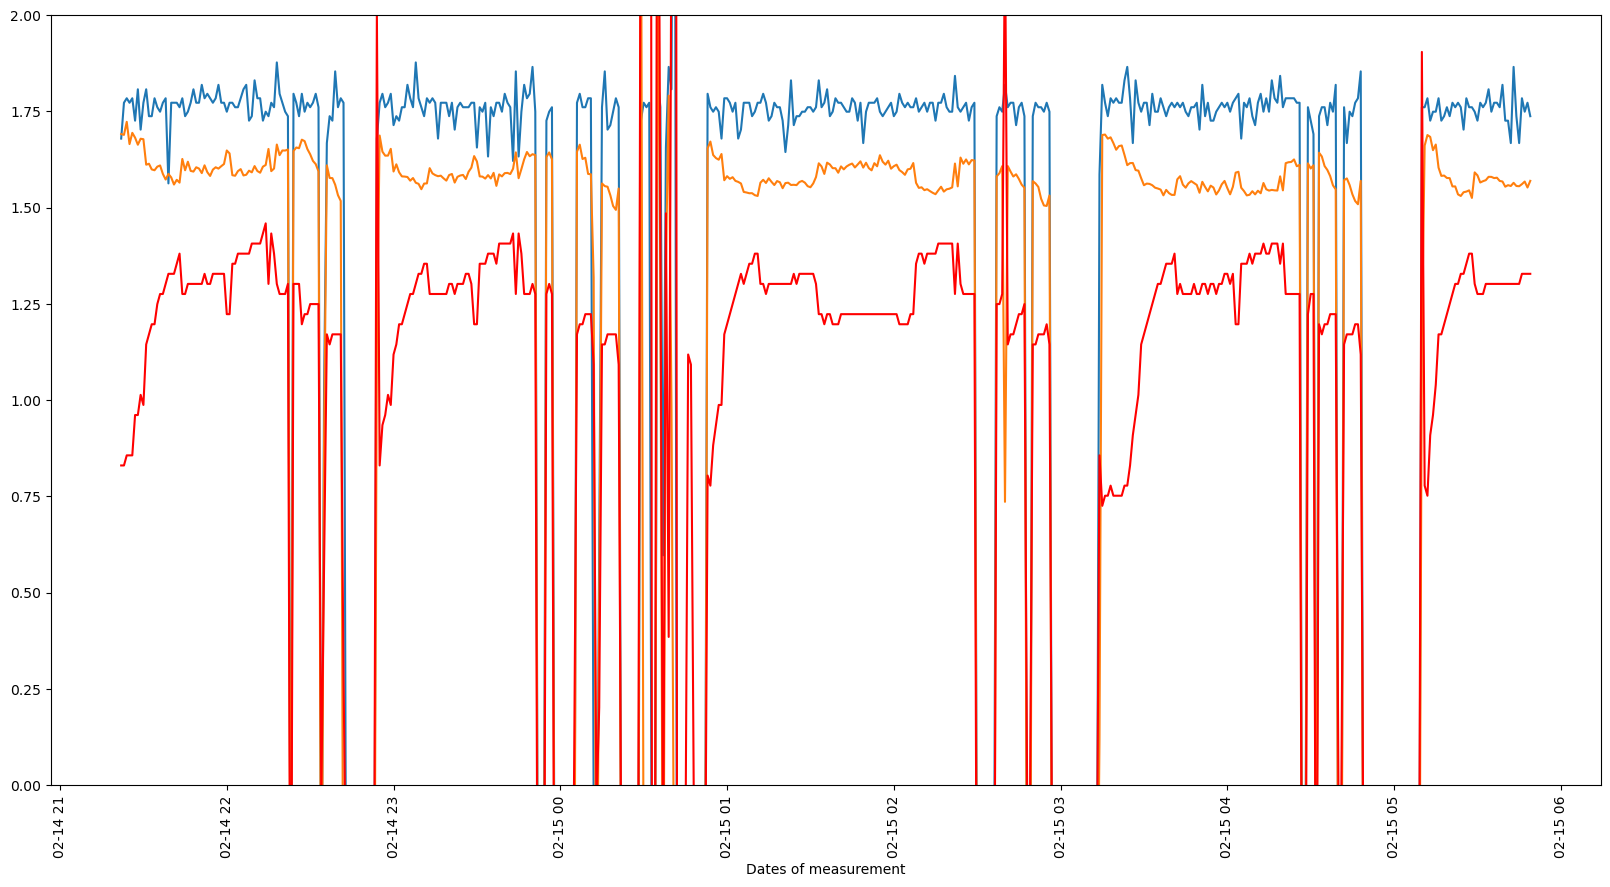

In [41]:
date1=datetime.datetime(2023,2,14,21,22)
date2=datetime.datetime(2023,2,15,5,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]


plt.figure(figsize=(20,10))
plt.plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]],data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]], data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_PIT 301.55'][ind1[0]:ind2[0]],'r')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('Dates of measurement')
plt.ylim([0,2])



5IAL_3_XPV301.13	5IAL_3_P301.70

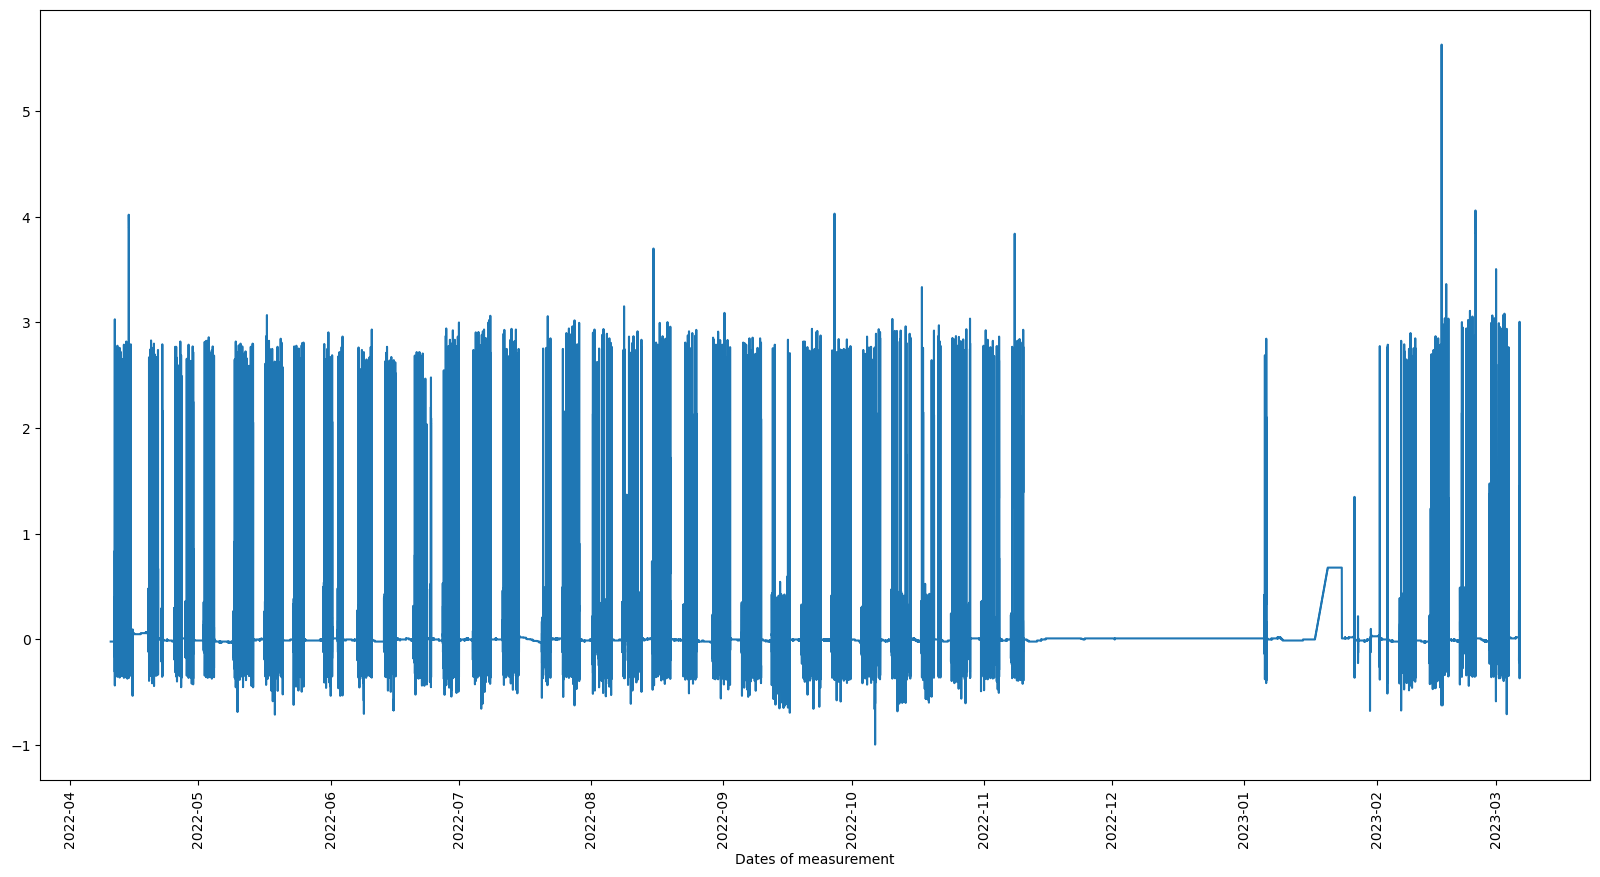

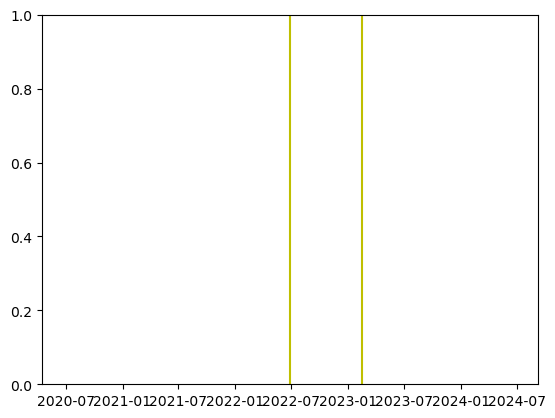

In [42]:
data['sub']=data['5IAL_3_PIT 301.55']-data['5IAL_3_P301.70']*0.35
data['sub_2_big']=(data['sub'] > (0.7))
data['int_sub_2_big']=data['sub_2_big'].apply(int)



plt.figure(figsize=(20,10))
plt.plot(data['Date'],data['sub'])
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('Dates of measurement')
plt.figure()



plt.axvline(datetime.datetime(2022,6,26,19,20),color='y')
plt.axvline(datetime.datetime(2023,2,14,12,51),color='y')



<Figure size 640x480 with 0 Axes>

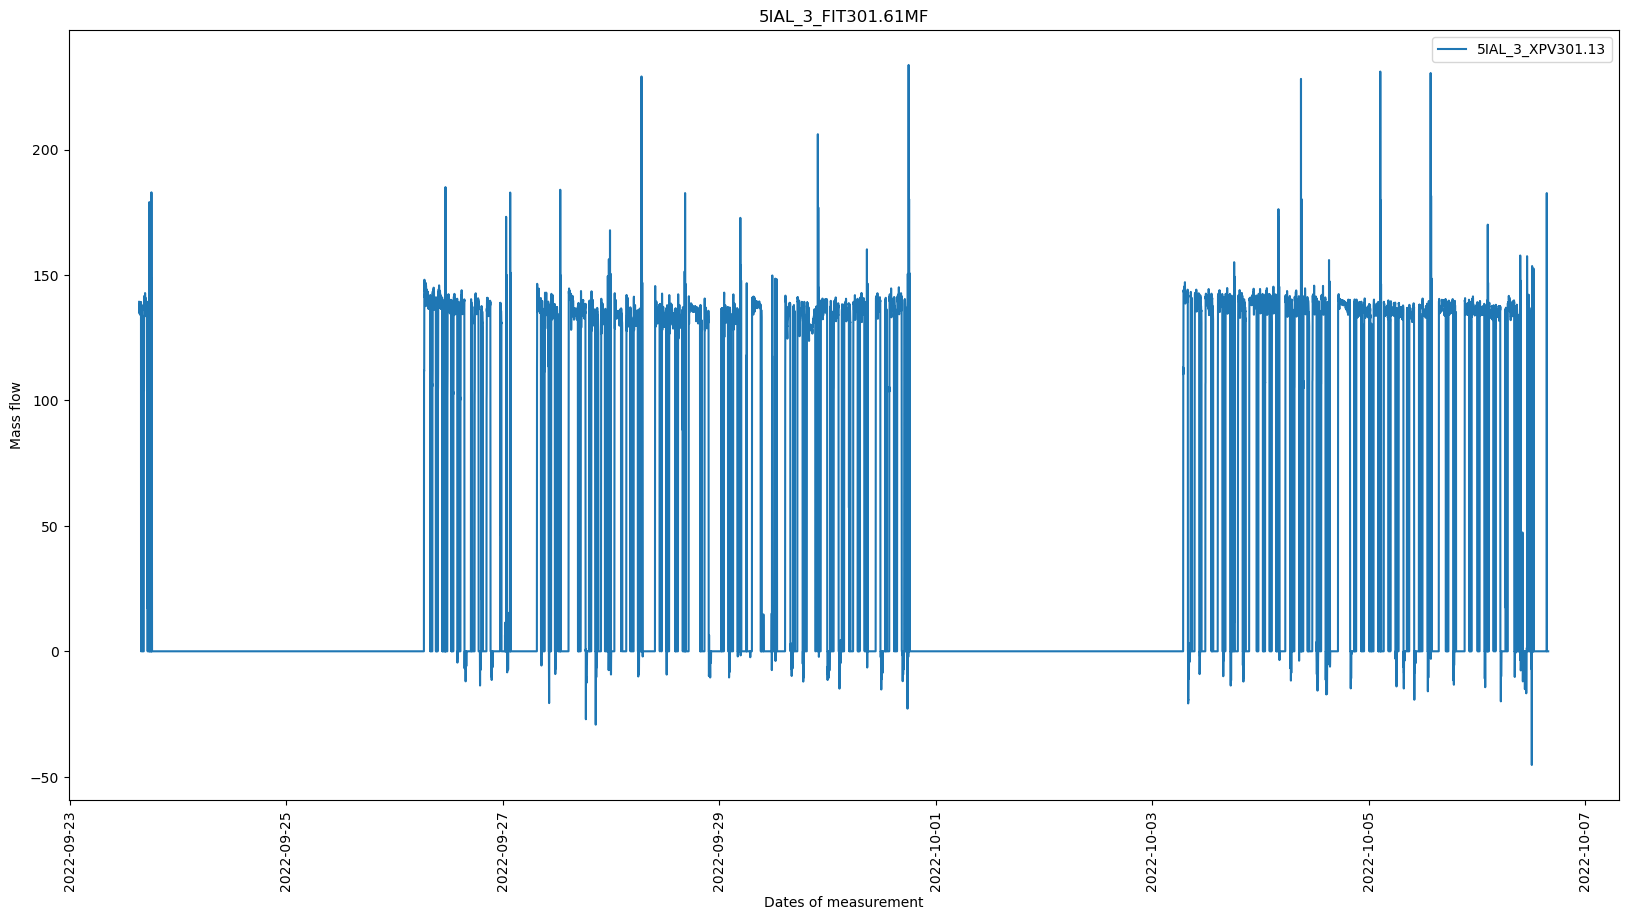

<Figure size 640x480 with 0 Axes>

In [43]:
date1=datetime.datetime(2022,9,23,15,22)
date2=datetime.datetime(2022,10,6,15,50)


ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

#+ data['5IAL_3_XPV301.13'][ind1[0]:ind2[0]])
data_column='5IAL_3_FIT301.61MF'

fig, ax = plt.subplots(figsize=(20,10))


ax.plot(data['Date'][ind1[0]:ind2[0]], (data[data_column][ind1[0]:ind2[0]]))
ax.set_title(data_column)
ax.set_xlabel('Dates of measurement')
ax.set_ylabel('Mass flow')
ax.tick_params(axis='x', labelrotation=90)
ax.legend(['5IAL_3_XPV301.13','5IAL_3_PIT 301.55'])
plt.figure()

# Trying to make a model recoginse deviating behavoir

## Normalised Mass flow substracted by normalised press.
I was hoping to capture what i have been able to show before

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


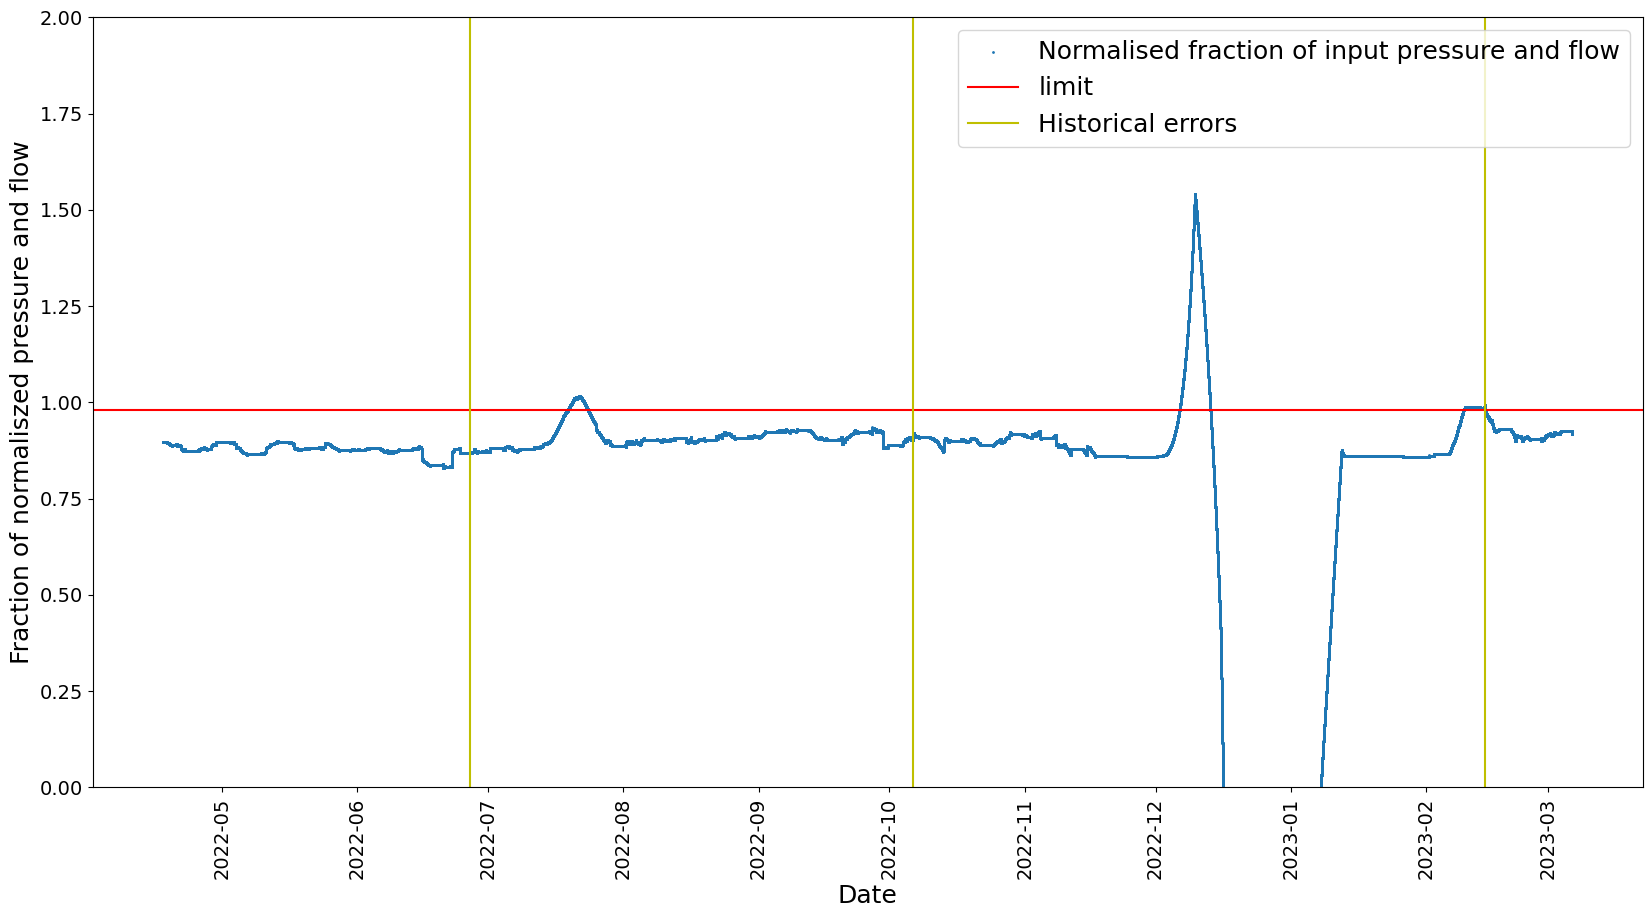

In [44]:
data['frac']=(pres_norm['5IAL_3_P301.70']/pres_norm['5IAL_3_FIT301.61MF'])

data['frac']= (abs(data['frac']) < 3) * data['frac']
#data['frac']= (norm['frac'] > 0) * norm['frac']
                                             


data['frac'] = data['frac'].rolling(60*24*7).mean() # Alternatief rollin mean van een week of 12 a 6 uur
    

plt.figure(figsize=(20,10))
plt.scatter(data['Date'],data['frac'],s=1)
plt.tick_params(axis='x', labelrotation=90)
plt.ylim([0,2])

plt.xlabel('Date', fontsize=18)
plt.ylabel('Fraction of normaliszed pressure and flow', fontsize=18)

plt.tick_params(axis='both', labelsize=14)

plt.axhline(0.98,color='r')


plt.axvline(datetime.datetime(2022,6,26,19,20),color='y')
plt.axvline(datetime.datetime(2022,10,6,11,23),color='y')
plt.axvline(datetime.datetime(2023,2,14,12,51),color='y')

plt.legend(['Normalised fraction of input pressure and flow', 'limit','Historical errors'], fontsize=18)

plt.savefig('plaatje',bbox_inches="tight")

plt.show()

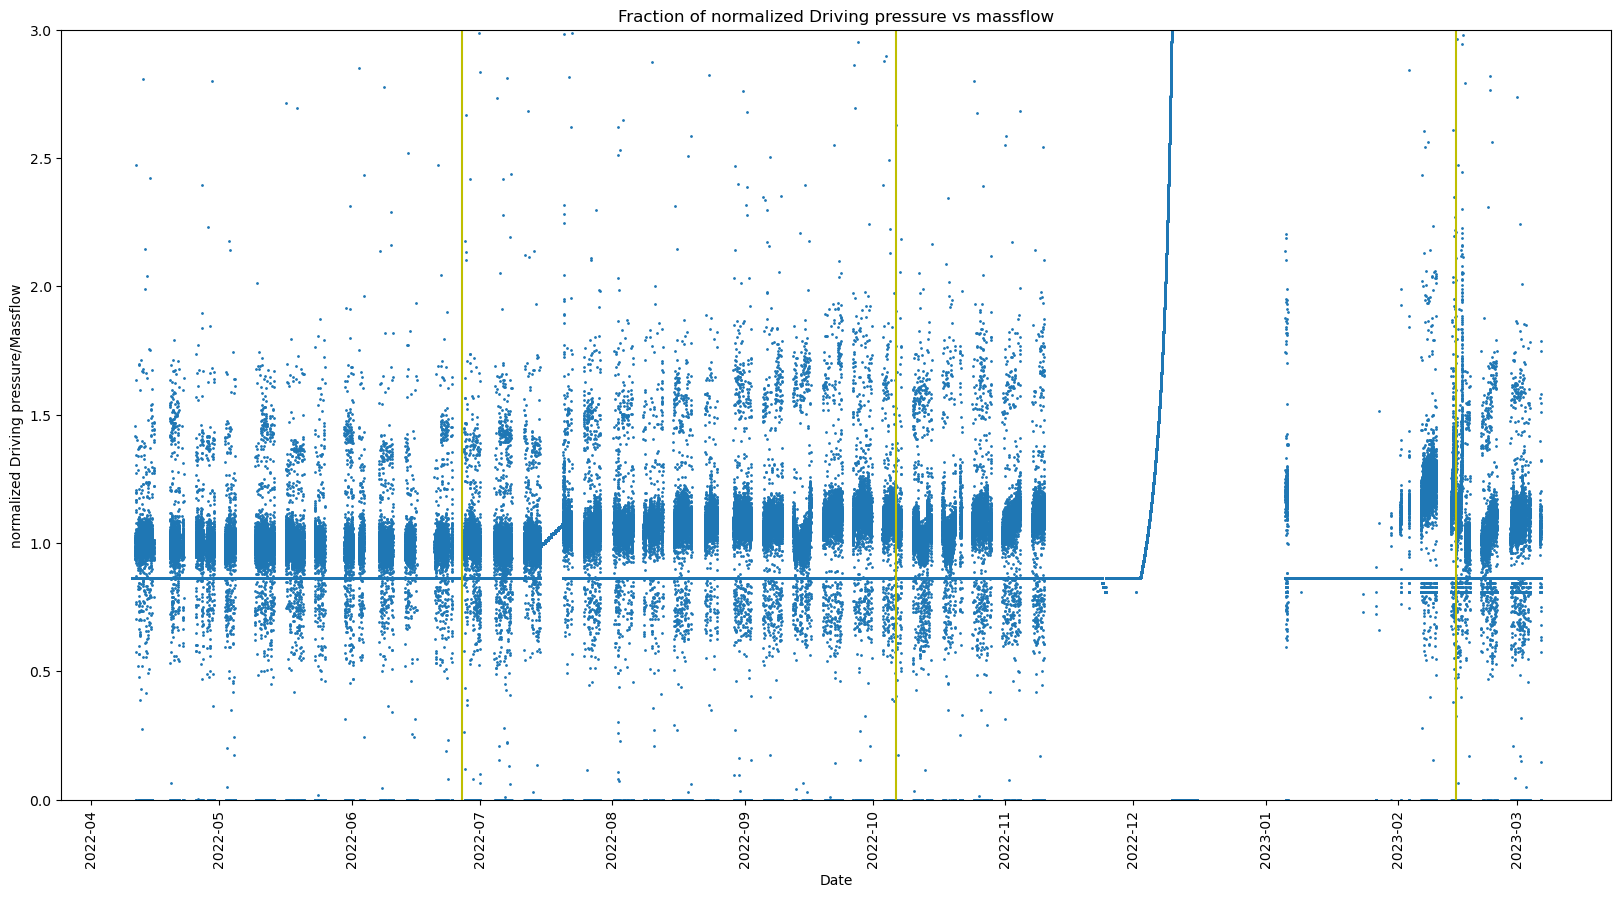

In [45]:
data['frac']=(pres_norm['5IAL_3_P301.70']/pres_norm['5IAL_3_FIT301.61MF'])

data['frac']= (abs(data['frac']) < 3) * data['frac']
#data['frac']= (norm['frac'] > 0) * norm['frac']
                                             


#data['frac'] = data['frac'].rolling(60*24,center=True).mean()
    

plt.figure(figsize=(20,10))
plt.scatter(data['Date'],data['frac'],s=1)
plt.tick_params(axis='x', labelrotation=90)
plt.ylim([0,3])
plt.ylabel('normalized Driving pressure/Massflow')
plt.xlabel('Date')
plt.title('Fraction of normalized Driving pressure vs massflow')

#plt.axhline(1.02,color='r')


plt.axvline(datetime.datetime(2022,6,26,19,20),color='y')
plt.axvline(datetime.datetime(2022,10,6,11,23),color='y')
plt.axvline(datetime.datetime(2023,2,14,12,51),color='y')

## Check the unexplained peak in the middle of july

Text(0.5, 0.98, 'Unexplained flow drop')

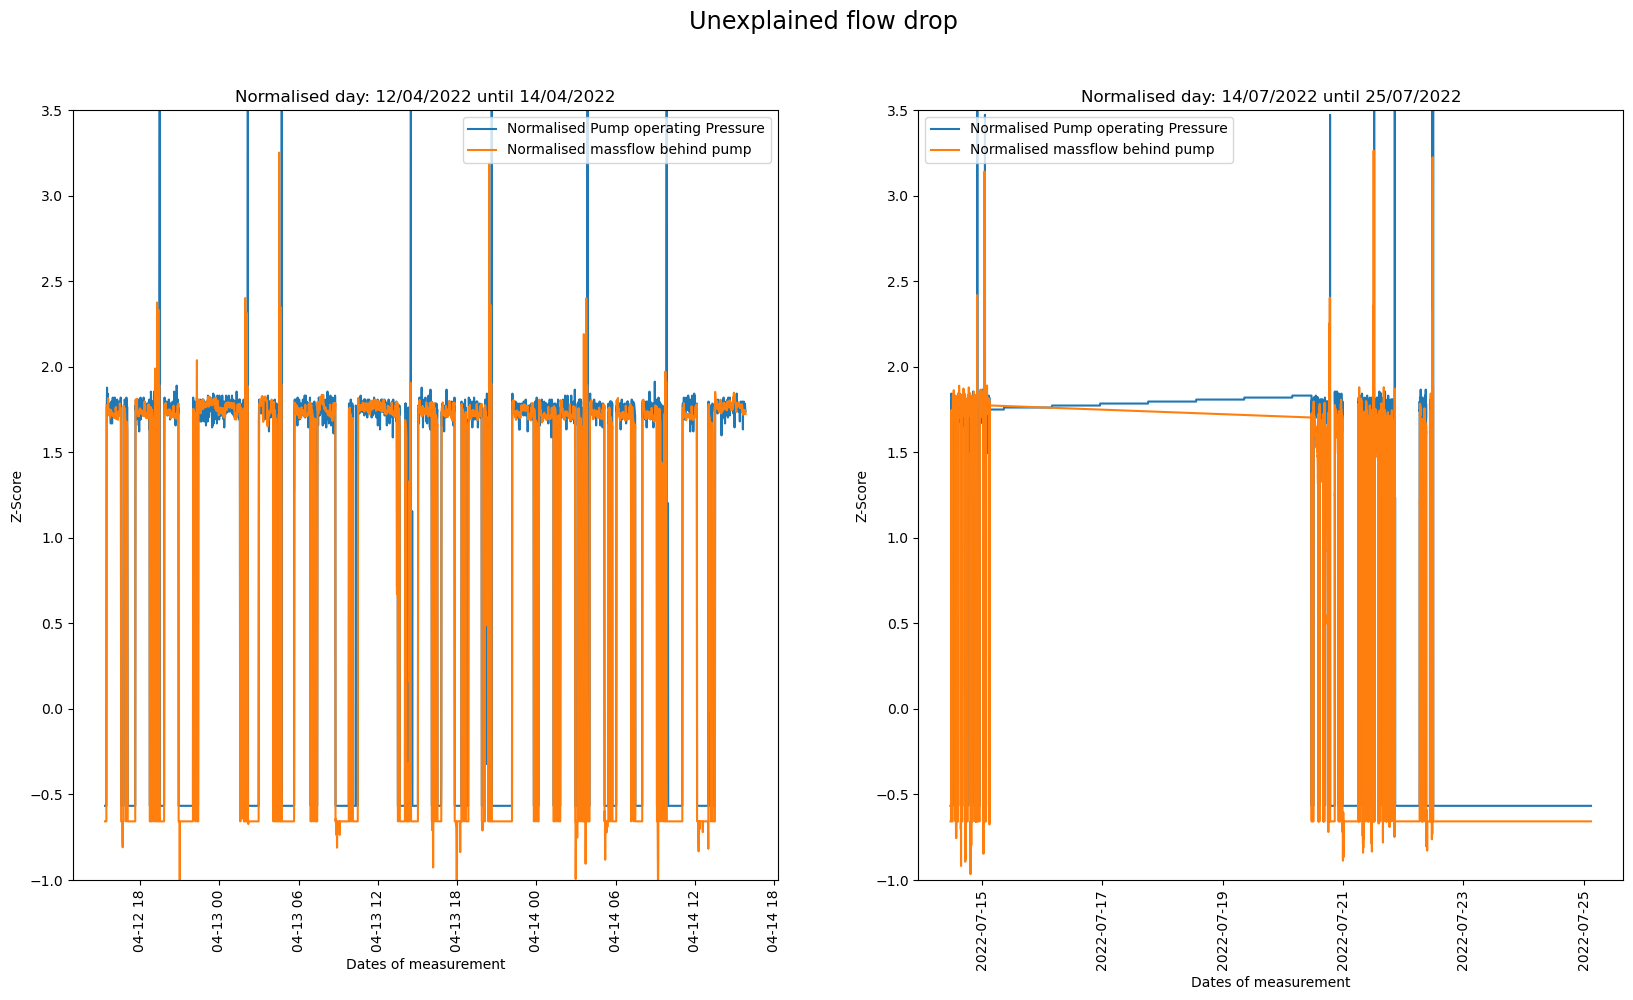

In [46]:
date1=datetime.datetime(2022,4,12,15,22)
date2=datetime.datetime(2022,4,14,15,50)

datefeb1=datetime.datetime(2022,7,14,11,23)
datefeb2=datetime.datetime(2022,7,25,3,0)

# datefeb1=datetime.datetime(2023,2,13,15,22)
# datefeb2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

indfeb1=data.index[data['Date'] == datefeb1]
indfeb2=data.index[data['Date'] == datefeb2]

date1_str=date1.strftime("%d/%m/%Y")
date2_str=date2.strftime("%d/%m/%Y")

datefeb1_str=datefeb1.strftime("%d/%m/%Y")
datefeb2_str=datefeb2.strftime("%d/%m/%Y")

title1='Normalised day: %s until %s'%(date1_str,date2_str)
title2='Normalised day: %s until %s'%(datefeb1_str,datefeb2_str)

data_column='5IAL_3_PIT 301.55'

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_P301.70'][ind1[0]:ind2[0]] , data['Date'][ind1[0]:ind2[0]],pres_norm['5IAL_3_FIT301.61MF'][ind1[0]:ind2[0]])
ax[0].set_title(title1)
ax[0].set_xlabel('Dates of measurement')
ax[0].set_ylabel('Z-Score')
ax[0].set_ylim(-1, 3.5)
ax[0].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].plot(data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_P301.70'][indfeb1[0]:indfeb2[0]] , data['Date'][indfeb1[0]:indfeb2[0]],pres_norm['5IAL_3_FIT301.61MF'][indfeb1[0]:indfeb2[0]])
ax[1].set_title(title2)
ax[1].set_xlabel('Dates of measurement')
ax[1].set_ylabel('Z-Score')
ax[1].set_ylim(-1, 3.5)
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].legend(['Normalised Pump operating Pressure','Normalised massflow behind pump'])

plt.suptitle('Unexplained flow drop', fontsize='xx-large')

To me this looks like a database error. Like the connection was lost and the missing points got filled up with a perfectly straight line between the last point and the next recieved point.

In [47]:

print(data['frac'])

0         0.861902
1         0.861902
2         0.861902
3         0.861902
4         0.861902
            ...   
475255    1.131278
475256    1.154422
475257    1.147623
475258    1.192820
475259    1.142404
Name: frac, Length: 475260, dtype: float64


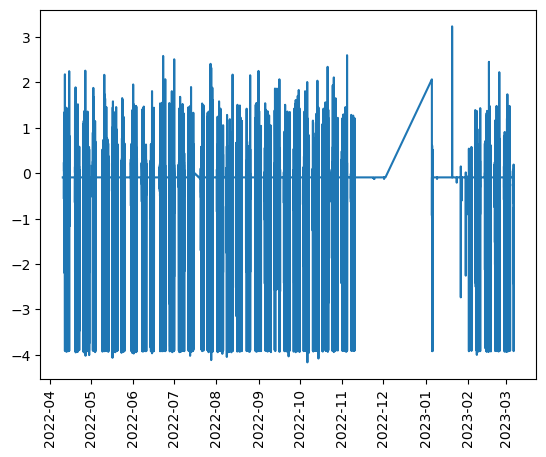

In [48]:
date1=datetime.datetime(2023,2,13,15,22)
date2=datetime.datetime(2023,2,14,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

plt.plot(data['Date'],pres_norm['5IAL_3_FIT301.61MF']-pres_norm['5IAL_3_P301.70'])
plt.tick_params(axis='x', labelrotation=90)

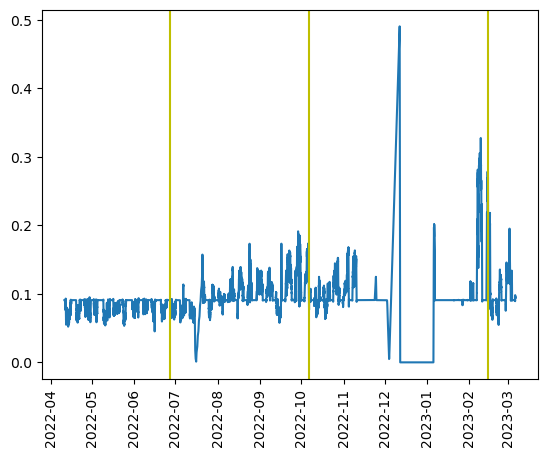

In [49]:
data['MF_min_PP']=abs(pres_norm['5IAL_3_FIT301.61MF']-pres_norm['5IAL_3_P301.70'])

data['MF_min_PP_OR']= (data['MF_min_PP'] < (0.5) ) * data['MF_min_PP']

#plt.plot(data['MF_min_PP_OR'])

data['Rolling_mean_Pdiff'] = data['MF_min_PP_OR'].rolling(440).mean()

plt.plot(data['Date'],np.abs(data['Rolling_mean_Pdiff']))
plt.tick_params(axis='x', labelrotation=90)

plt.axvline(datetime.datetime(2022,6,26,19,20),color='y')
plt.axvline(datetime.datetime(2022,10,6,11,23),color='y')
plt.axvline(datetime.datetime(2023,2,14,12,51),color='y')

2022-07-20 17:13:00


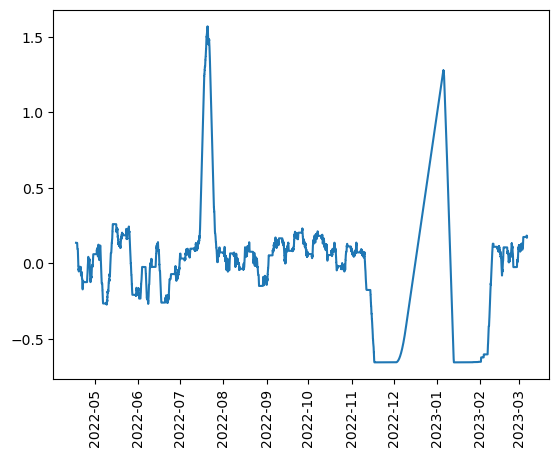

In [50]:
data['Rolling_mean_MF'] = pres_norm['5IAL_3_FIT301.61MF'].rolling(1440*7).mean()

index=data['Rolling_mean_MF'].idxmax()
print(data['Date'][index])

#plt.plot(data['Date'],pres_norm['5IAL_3_FIT301.61MF'])
plt.plot(data['Date'],data['Rolling_mean_MF'])
plt.tick_params(axis='x', labelrotation=90)



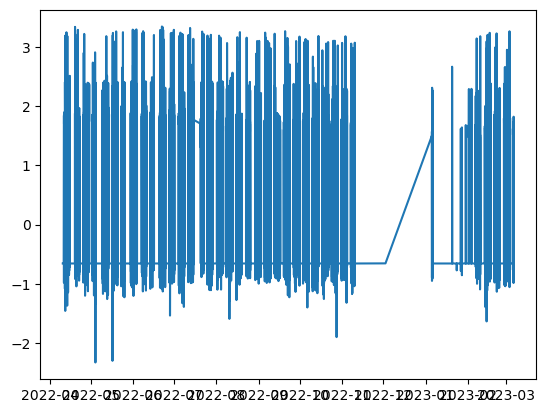

In [51]:
date1=datetime.datetime(2022,7,10,15,22)
date2=datetime.datetime(2022,7,30,15,50)

ind1=data.index[data['Date'] == date1]
ind2=data.index[data['Date'] == date2]

plt.plot(data['Date'],pres_norm['5IAL_3_FIT301.61MF'])

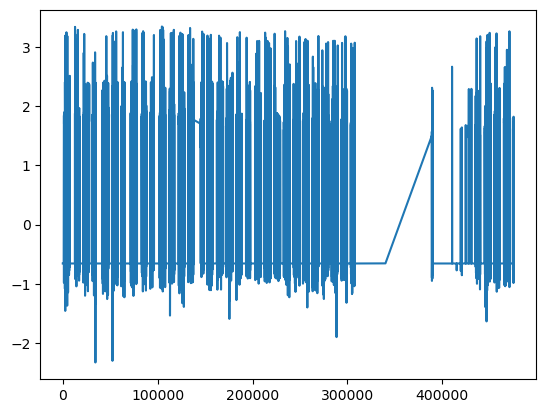

In [52]:
plt.plot(pres_norm['5IAL_3_FIT301.61MF'])

## PIT 55 RC 


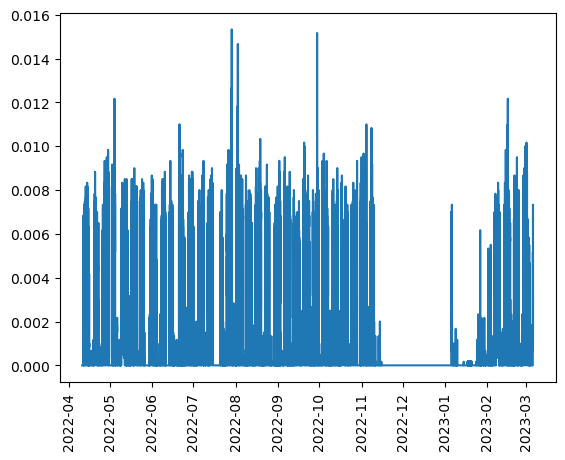

In [53]:
data['Pres_next'] = data['5IAL_3_PIT 301.55'].shift(periods=1)

data['Pres_RC'] = data['5IAL_3_PIT 301.55']-data['Pres_next']

data['Pres_RC'] =  ((data['Pres_RC'] < 0.1) & (data['Pres_RC'] > 0)) * data['Pres_RC']

data['Pres_RC'] =  data['Pres_RC'].rolling(60).mean()


date1=datetime.datetime(2023,2,13,16,22)
date2=datetime.datetime(2023,2,13,17,50)


plt.plot(data['Date'],data['Pres_RC'])
plt.tick_params(axis='x', labelrotation=90)


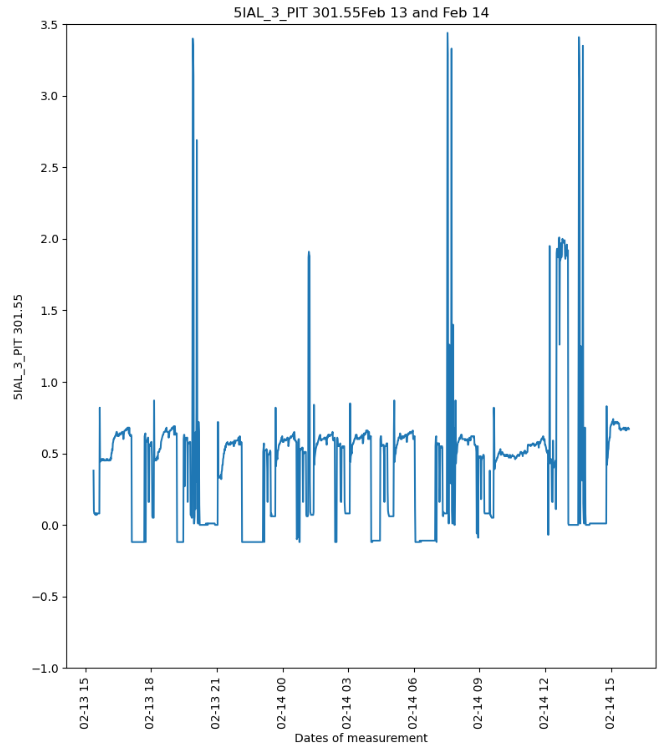

In [54]:
data['sub']=data['5IAL_3_PIT 301.55']-data['5IAL_3_P301.70']*0.35
data['sub_2_big']=(data['sub'] > (0.7))


data['cum_sum'] = data['sub_2_big'].cumsum()

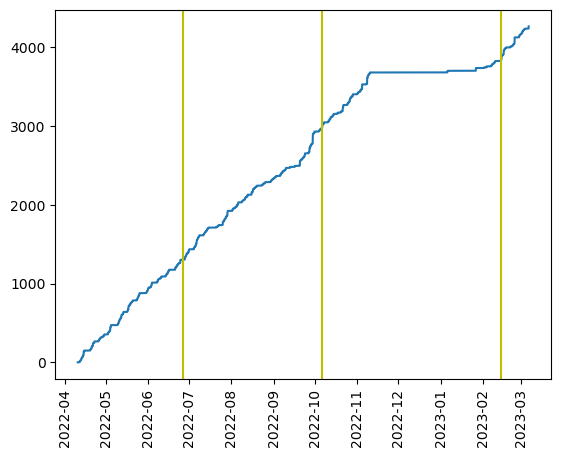

In [55]:
plt.plot(data['Date'],data['cum_sum'])
plt.tick_params(axis='x', labelrotation=90)
plt.axvline(datetime.datetime(2022,6,26,19,20),color='y')
plt.axvline(datetime.datetime(2022,10,6,11,23),color='y')
plt.axvline(datetime.datetime(2023,2,14,12,51),color='y')

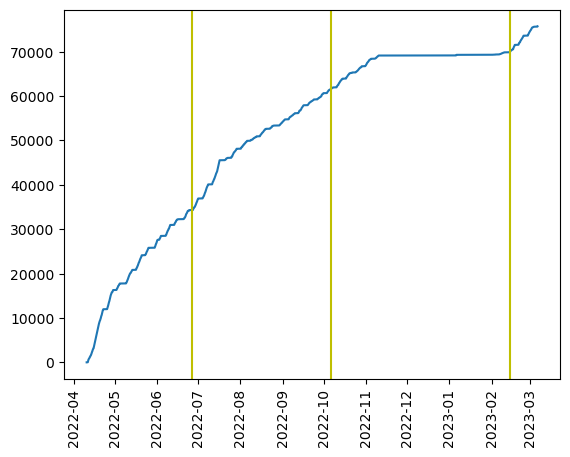

In [56]:
data['Aanzuig_druk'] = ((data['5IAL_3_PIT 301.55']*2.8) > data['5IAL_3_P301.70']) & (data['5IAL_3_301.BatchName'] != 'No Batch Specified')

data['Aanzuig_druk_duur'] = data['Aanzuig_druk'].cumsum()

plt.plot(data['Date'],data['Aanzuig_druk_duur'])
plt.tick_params(axis='x', labelrotation=90)

plt.axvline(datetime.datetime(2022,6,26,19,20),color='y')
plt.axvline(datetime.datetime(2022,10,6,11,23),color='y')
plt.axvline(datetime.datetime(2023,2,14,12,51),color='y')

In [57]:
# data['Producing']= (data["5IAL_3_301.BatchName"] != 'No Batch Specified') & (not('Na' in data["5IAL_3_301.BatchName"] ))
# print(data['Producing'].sum())
# data['Producing2']= (data["5IAL_3_301.BatchName"].str.len() == 11) ^ (data["5IAL_3_301.BatchName"].str.len() == 12)
# print(data['Producing2'].sum())
# data['Producing2'].head()

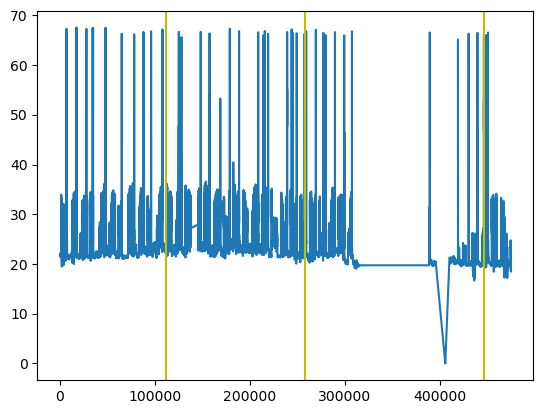

In [58]:
plt.plot(data['5IAL_3_TT301.50'])

plt.axvline(data.index[data['Date']==datetime.datetime(2022,6,26,19,20)],color='y')
plt.axvline(data.index[data['Date']==datetime.datetime(2022,10,6,11,23)],color='y')
plt.axvline(data.index[data['Date']==datetime.datetime(2023,2,14,12,51)],color='y')